<h1> Data Analysis on Video Game Sales </h1>
Dataset provided by SID_TWR on Kaggle, scraped from vgchartz.com <br>
Dataset anaylsed by Luna Liu

<h2>0. Setup</h2>

In [1]:
# numpy for numerical analysis
import numpy as np
# pandas to process the data in a dataframe
import pandas as pd
pd.plotting.register_matplotlib_converters()

# matplotlib for basic visulaisation
import matplotlib.pyplot as plt
%matplotlib inline
# seaborn for more advanced plotting
import seaborn as sns

In [2]:
# Filepath to read

vg_data_filepath = "Data/Video_Games_Sales.csv"

In [3]:
# Using chardet to determine the encoding

import chardet
with open(vg_data_filepath, 'rb') as rawdata:
    vg_result = chardet.detect(rawdata.read(30000))    

print(vg_result)

{'encoding': 'utf-8', 'confidence': 0.938125, 'language': ''}


In [4]:
# Reading file into variables

vg_data = pd.read_csv(vg_data_filepath, encoding='utf-8')

<h2>1. Description of Video Game Sales Data</h2>

<h3> 1.1 Overview </h3>

In [5]:
# Find number of rows & columns

vg_data.shape

(16719, 16)

We have 11 total fields and 16719 entries.

In [6]:
# Print first 5 rows

vg_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Find data field headers and datatype

vg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


Here we can see the fields included within this dataset. A short explanation of them below:
<ul>
    <li><b>Name</b> - The title of the Video Game</li>
    <li><b>Platform</b> - The platform the game was released on (e.g. PC, Wii etc.)</li>
    <li><b>Year_of_Release</b> - The year the game was released</li>
    <li><b>Genre</b> - The genre of the game (as classified by vgchartz)</li>
    <li><b>Publisher</b> - The company which published the game</li>
    <li><b>NA_Sales</b> - Sales in North America (in millions)</li>
    <li><b>EU_Sales</b> - Sales in Europe (in millions)</li>
    <li><b>JP_Sales</b> - Sales in Japan (in millions)</li>
    <li><b>Other_Sales</b> - Sales in the rest of the world (in millions)</li>
    <li><b>Global_Sales</b> - Total sales across the world (in millions)</li>
    <li><b>Critic_Score</b> - Rounded mean score given to a game by critics (an integer out of 100)</li>
    <li><b>Critic_Count</b> - Number of critic scores given</li>
    <li><b>User_Score</b> - Rounded mean score given to a game by users of vgchartz (to the nearest tenth)</li>
    <li><b>User_Count</b> - Number of user scores given</li>
    <li><b>Developer</b> - The comapny which developed the video game</li>
    <li><b>Rating</b> - Official ESRB rating</li>
</ul>

Note that the same game title can appear multiple times releasing under different platforms, and even years, as seen below.

In [8]:
# Example showing repeated video game titles

vg_data.loc[vg_data.Name == 'Grand Theft Auto V']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
165,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.81,2.19,0.00,0.47,5.48,97.0,14.0,7.9,764.0,Rockstar North,M
1730,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.39,0.69,0.00,0.09,1.17,96.0,57.0,7.9,3756.0,Rockstar North,M


<h3> 1.2 Null Values </h3>

We can see the some fields have many entries with null data

In [9]:
vg_data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Certain fields have high missing values due to the fact they were not applicable to certain games. For example, ESRB was established in 1994 which means many video games created before then will likely not have a rating.

Our main interest is in the sales values which thankfully have no null values. However, there are still a few null values in other fields. As our dataset is quite large, we choose to drop records which have null values in either their name, year of release, genre or publisher.

In [10]:
vg_data = vg_data.dropna(subset=['Name', 'Year_of_Release', 'Genre', 'Publisher'])

vg_data.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         8955
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

In [11]:
vg_data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,7982.000000,7982.000000,7461.000000,7461.000000
mean,2006.489888,0.264129,0.146034,0.078623,0.047670,0.536708,68.997119,26.440992,7.126900,163.008846
std,5.881148,0.819028,0.507134,0.311348,0.188156,1.559885,13.918755,19.009305,1.498886,563.932422
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


<h3> 1.3 Potential Correlations </h3>

Let's have a look at some potential correlations between different fields in the dataset.

<AxesSubplot:title={'center':'Heatmap of the Video Game Dataset'}>

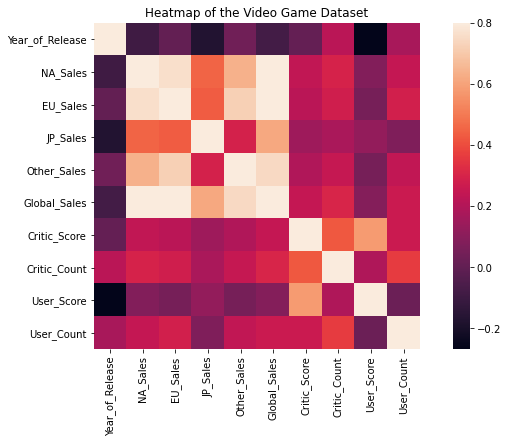

In [12]:
corr_mat = vg_data.corr()
plt.figure(figsize=(12,6))
plt.title("Heatmap of the Video Game Dataset")
sns.heatmap(corr_mat, vmax=.8, square=True)

Immediately, we can see how all the values of NA, EU, JP, Other and Global sales are very highly correlated. Global sales's multicollinearity is expected since it is the sum of all the region's sales. It is also fair to expect a video game that garnered high sales in one region to also sell well in another region.

Interestingly, JP sales seem to have the weakest correlation compared to the other markets possibly suggesting there is less overlap between the markets in Japan than other regions.

Similarly, Critic score and User score seem to be strongly correlated too. Since a game that scored highly with critics is likely to be seen as a good game, users are likely to score it highly too and vice versa.

Year of Release appears to have very little correlation with sales and either score metric.

<h2> 2. Analysis </h2>

<h3> 2.1 Analysing Sales</h3>

<h4>An Overview of Sales Data</h4>

In [13]:
vg_data[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16416.000000,16416.000000,16416.000000,16416.000000
mean,0.264129,0.146034,0.078623,0.047670
std,0.819028,0.507134,0.311348,0.188156
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


In [14]:
vg_data['Global_Sales'].describe()

count    16416.000000
mean         0.536708
std          1.559885
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.530000
Name: Global_Sales, dtype: float64

This small summary already shows some interesting results. The mean total of global sales is greater than even the 75% quartile. This suggests a strong positive skew in the data.

Additionally, we can see how in this dataset, the mean sales in North America is higher than all other regions by a reasonable margin.

Text(0, 0.5, '')

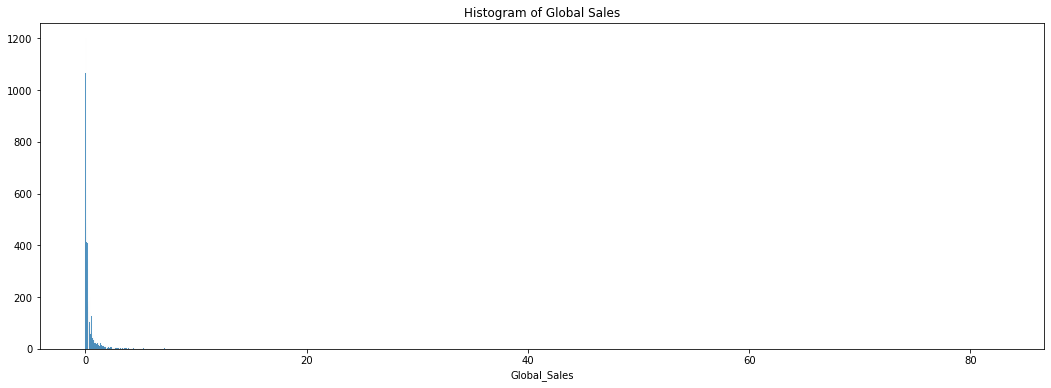

In [92]:
# Plotting the global sales values in a histogram

plt.figure(figsize=(18,6))
plt.title("Histogram of Global Sales of Video Games")
sns.histplot(data=vg_data['Global_Sales'], binwidth=0.01)
plt.ylabel("")

This figure illuminates how large the positive skew is for the global sales. The vast majority of the games get lower sales while a select few games tend to get a very high number of sales.

In [16]:
vg_data.sort_values('Global_Sales', ascending=False)[:10]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


As we can see, these outliers are not due to an error in the data collection, but are in fact some of the most popular video games of all time. We will discuss these in greater depth later.

To garner a better understanding of a larger majority of games, certain graphs will also be displayed without games with global sales above 10 million.

Text(0, 0.5, '')

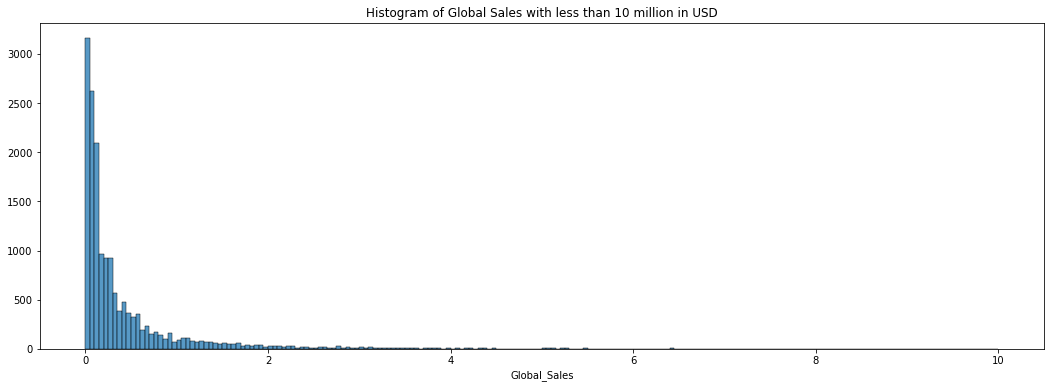

In [17]:
# Plotting the global sales of video games with less than 10 million global sales in USD

plt.figure(figsize=(18,6))
plt.title("Histogram of Video Games with Global Sales with less than 10 million in USD")
sns.histplot(data=vg_data['Global_Sales'], binwidth=0.05, binrange=[0,10])
plt.ylabel("")

<h4>Skew and Kurtosis</h4>

We should also have a look at the skewness and kurtosis of the distribution

In [18]:
vg_data['Global_Sales'].skew()

17.28599301527773

In [19]:
vg_data['Global_Sales'].kurt()

596.4311261407373

As seen in the histograms, the distribution of the global sales is heavily positively skewed as well as having a very high kurtosis (i.e. the distribution has a heavy tail)

<h3> 2.2 Platform</h3>

<h4>What video game platforms are in the dataset?</h4>

In [20]:
vg_data.Platform.value_counts().index.sort_values()

Index(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object')

There are a lot of different platforms here. Their full names are listed here here, grouped by company then by year of release:

| Company | Abbreviation | Full name | Year of Release |
| --- | --- | --- | --- |
| The 3DO Company | 3DO | 3DO Interactive Multiplayer | 1993 |
| Atari | 2600 | Atari 2600 | 1977 |
| Bandai | WS | WonderSwan | 1999 |
| NEC & Hudson Soft | TG16 | TurboGrafx-16 | 1987 |
| NEC & Hudson Soft | PC-FX | PC-FX | 1994 |
| Microsoft | XB | Xbox | 2001 |
| Microsoft | X360 | Xbox 360 | 2005 |
| Microsoft | XOne | Xbox One | 2013 |
| Nintendo | NES | Nintendo Entertainment System | 1983 |
| Nintendo | GB | Game Boy | 1989 |
| Nintendo | SNES | Super Nintendo Entertainment System | 1990 |
| Nintendo | N64 | Nintendo 64 | 1996 |
| Nintendo | GBA | Game Boy Advance | 2001 |
| Nintendo | GC | Gamecube | 2001 |
| Nintendo | DS | Nintendo DS | 2004 |
| Nintendo | Wii | Wii | 2006 |
| Nintendo | 3DS | Nintendo 3DS | 2011 |
| Nintendo | WiiU | Wii U | 2012 |
| Sega | GEN | Sega Genesis | 1988 |
| Sega | DC | Dreamcast | 1998 |
| Sega | GG | Game Gear | 1990 |
| Sega | SCD | Sega CD | 1991 |
| Sega | SAT | Sega Saturn | 1994 |
| Sony | PS | PlayStation | 1994 |
| Sony | PS2 | PlayStation 2 | 2000 |
| Sony | PSP | PlayStation Portable | 2004 |
| Sony | PS3 | PlayStation 3 | 2006 |
| Sony | PSV | PlayStation Vita | 2011 |
| Sony | PS4 | PlayStation 4 | 2013 |
| SNK Corporation | NG | Neo Geo | 1990 |
| - | PC | Personal Computer | 1985* |

\*Year of Release for PC is taken as the oldest PC game in the database

In [21]:
vg_data.loc[vg_data.Platform == 'PC'].sort_values('Year_of_Release').head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14472,Alter Ego,PC,1985.0,Simulation,Activision,0.00,0.03,0.0,0.01,0.03,59.0,9.0,5.8,19.0,"Viva Media, Viva Media, LLC",T
14623,SimCity,PC,1988.0,Simulation,Maxis,0.00,0.02,0.0,0.01,0.03,64.0,75.0,2.2,4572.0,Maxis,E10+
769,SimCity 2000,PC,1992.0,Simulation,Maxis,1.20,0.84,0.0,0.10,2.14,NaN,NaN,NaN,NaN,NaN,NaN
14612,Doom,PC,1992.0,Shooter,id Software,0.02,0.00,0.0,0.00,0.03,85.0,44.0,8.2,1796.0,id Software,M
2612,The 7th Guest,PC,1992.0,Adventure,Virgin Interactive,0.02,0.77,0.0,0.00,0.78,NaN,NaN,NaN,NaN,Trilobyte,T


<h4>How many video games have been released for each platform?</h4>

<AxesSubplot:title={'center':'Count of Video Games by Platform'}, xlabel='count', ylabel='Platform'>

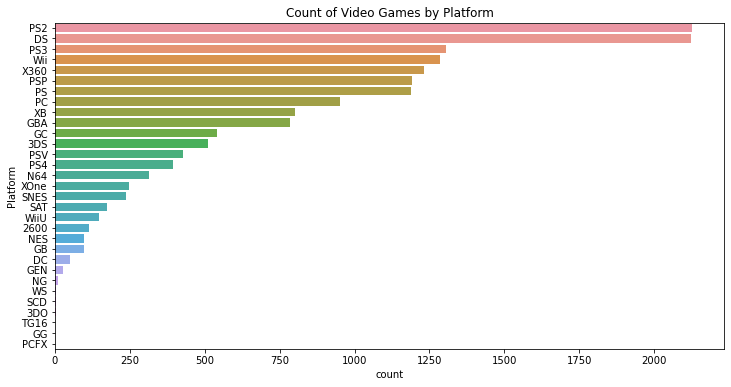

In [22]:
# Counting releases of video games by platform

plt.figure(figsize=(12,6))
plt.title("Count of Video Games by Platform")
sns.countplot(y='Platform', data=vg_data, order=vg_data.Platform.value_counts().index)

We can see that the Nintendo DS and Playstation 2 the largest amount of releases by quite a large margin. The count is also not just due to these consoles having longer periods until their sucessor was released, as each of these consoles were released 6 or 7 years before their successor.

In fact, most titles end up being released for Sony, Nintendo and Microsoft consoles who comprise 16 of the top 17 counts.

The highest console that was not a Sony, Nintendo nor Microsoft console is the PC at rank 8 followed by the Sega Saturn at rank 18.

<h4>Sales and Platform</h4>

Let us have a look at a summary of the global sales when the video games are grouped by platform, as well as their total sales.

In [23]:
vg_data.groupby('Platform')['Global_Sales'].describe().reset_index()

,Platform,count,mean,std,min,25%,50%,75%,max
0,2600,116.0,0.746293,0.955571,0.07,0.3050,0.475,0.7800,7.81
1,3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
2,3DS,512.0,0.503750,1.441374,0.01,0.0500,0.120,0.3400,14.60
3,DC,52.0,0.307115,0.469912,0.02,0.0775,0.135,0.2975,2.42
4,DS,2122.0,0.378761,1.435772,0.01,0.0500,0.110,0.2700,29.80
5,GB,97.0,2.622887,5.390733,0.06,0.3000,1.180,2.1800,31.37
6,GBA,786.0,0.388830,0.912071,0.01,0.0600,0.160,0.3900,15.85
7,GC,542.0,0.363727,0.693107,0.01,0.0700,0.150,0.3700,7.07
8,GEN,27.0,1.050370,1.492217,0.03,0.0700,0.150,1.7100,6.03
9,GG,1.0,0.040000,NaN,0.04,0.0400,0.040,0.0400,0.04


<AxesSubplot:title={'center':'Total of Global Sales of Video Games by Platform'}, xlabel='Global_Sales', ylabel='Platform'>

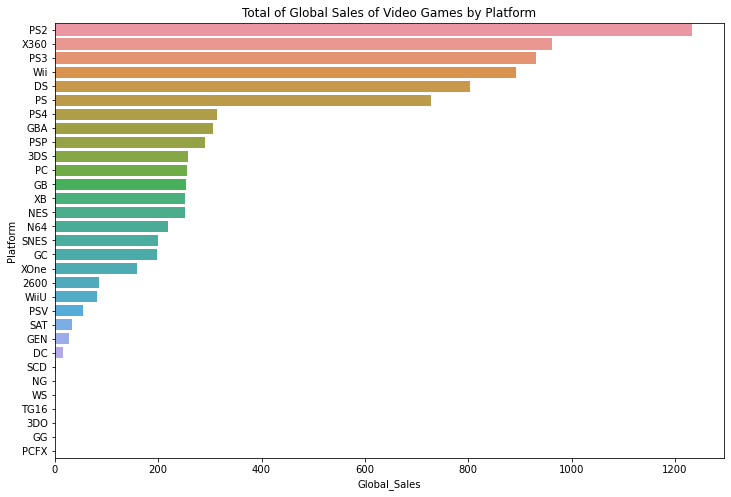

In [93]:
plt.figure(figsize=(12,8))
plt.title("Total of Global Sales of Video Games by Platform")
sns.barplot(data=vg_data.groupby('Platform', as_index=False).sum(), x='Global_Sales', y='Platform', order=vg_data.groupby('Platform', as_index=False).sum().sort_values('Global_Sales', ascending=False).Platform)

The PS2, Xbox 360, PS3 then Wii have the highest total global sales. This isn't too surprising due to them having some of the highest numbers of video games. However, despite the DS having the 2nd most games in total, its global sales put it in 5th.

Let's look at the box plot of these figures.

<AxesSubplot:title={'center':'Global Sales of Video Games by Platform'}, xlabel='Platform', ylabel='Global_Sales'>

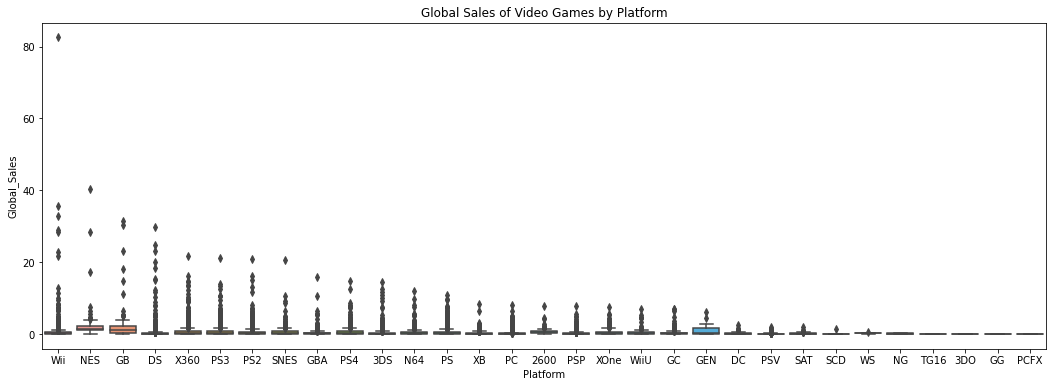

In [25]:
plt.figure(figsize=(18,6))
plt.title("Global Sales of Video Games by Platform")
sns.boxplot(data=vg_data,y='Global_Sales', x="Platform")

<AxesSubplot:title={'center':'Global Sales of Video Games by Platform that sold less than 10 million USD'}, xlabel='Platform', ylabel='Global_Sales'>

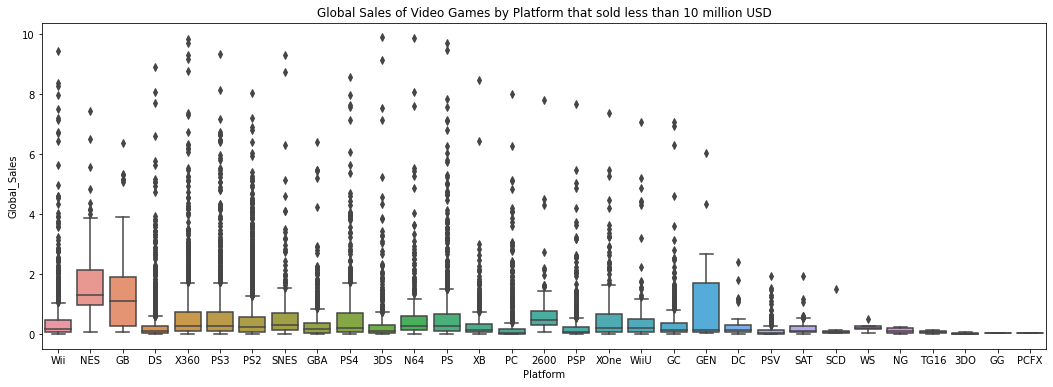

In [26]:
plt.figure(figsize=(18,6))
plt.title("Global Sales of Video Games by Platform that sold less than 10 million USD")
sns.boxplot(data=vg_data[vg_data.Global_Sales <= 10],y='Global_Sales', x="Platform", order=vg_data.groupby('Platform', sort=False)['Global_Sales'].max().index)

We can see some interesting patterns emerge.

Most of the outliers with extreme values of global sales come from video games released on the Nintendo Wii, NES, Gameboy or Nintendo DS. Notably, these are all Nintendo consoles.
While the Playstation 2, Playstation 3 and Xbox 360 had high total sales, their outliers do not quite reach the extremes of the aforementioned consoles.

Here, we can very clearly see how the NES and Gameboy both have far higher means compared to all the other platforms. Considering how they have very few video games released in comparison to other consoles, it suggests that the few games they did release generally had high global sales.

The Nintendo DS, Gameboy Advanced, 3DS, PSP and PS Vita all have relatively smaller interquartile range compared to some other consoles in their generation. Interestingly, these are all handheld consoles. However, the Nintendo Wii and PC also share similarly small interquartile ranges and are not handheld consoles.

<h4>How do games fare on different consoles?</h4>

It is not unusual for games to be released on multiple consoles. As each console tends to have different target audiences, this raises an interesting question on if certain video games sell better on different consoles.

Firstly, we will see which games have been released on different consoles.

In [27]:
# First we find out which video games have beeen released on multiple platforms

multiplatform_titles = vg_data[vg_data.Name.duplicated(keep=False)]

multiplatform_titles.Name.value_counts()

Need for Speed: Most Wanted               12
Ratatouille                                9
FIFA 14                                    9
LEGO Marvel Super Heroes                   9
FIFA 15                                    8
                                          ..
Ferrari Challenge Trofeo Pirelli           2
Summer Challenge: Athletics Tournament     2
Earth Defense Force: Insect Armageddon     2
ESPN MLB Baseball                          2
Metal Gear Solid                           2
Name: Name, Length: 2749, dtype: int64

There are 2749 video games which have been released on at least two different platforms.

Let us compare Need for Speed, Monopoly and Ratatouille individually first.

In [28]:
vg_data[vg_data.Name == 'Need for Speed: Most Wanted']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37,82.0,36.0,9.1,137.0,EA Canada,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.46,0.06,0.58,2.81,NaN,NaN,NaN,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.78,0.01,0.15,1.56,83.0,54.0,8.5,134.0,EA Canada,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.13,0.02,0.10,1.25,83.0,54.0,8.5,134.0,EA Canada,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04,83.0,32.0,8.8,29.0,EA Canada,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,Electronic Arts,0.33,0.45,0.01,0.22,1.01,NaN,NaN,NaN,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56,80.0,18.0,9.1,22.0,EA Canada,T
5973,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.04,0.29,82.0,19.0,8.5,525.0,Black Box,T
6274,Need for Speed: Most Wanted,WiiU,2013.0,Racing,Electronic Arts,0.13,0.12,0.00,0.02,0.27,NaN,NaN,NaN,NaN,NaN,NaN
6411,Need for Speed: Most Wanted,DS,2005.0,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27,45.0,4.0,6.1,22.0,EA Canada,E


It's important to note that the reason Need for Speed: Most Wanted has been released of the most platforms is due to it being rereleased in later years. The dataset has both its original release (in 2005) and its rebooted release (in 2012) and these both have the exact same name.

<AxesSubplot:title={'center':'Total Global Sales of Need for Speed: Most Wanted over different platforms'}, xlabel='Global_Sales', ylabel='Platform'>

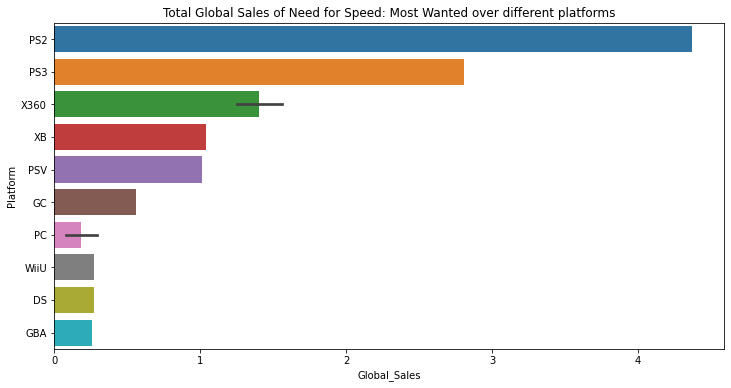

In [29]:
# Looking at Need for Speed: Most Wanted

plt.figure(figsize=(12,6))
plt.title("Total Global Sales of Need for Speed: Most Wanted over different platforms")
sns.barplot(data=vg_data[vg_data.Name == 'Need for Speed: Most Wanted'], x='Global_Sales', y='Platform')

<AxesSubplot:title={'center':'Total Global Sales of Monopoly over different platforms'}, xlabel='Global_Sales', ylabel='Platform'>

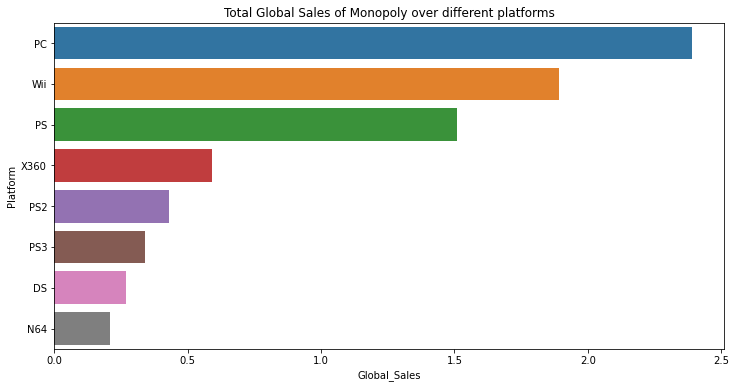

In [30]:
# Looking at Monopoly

plt.figure(figsize=(12,6))
plt.title("Total Global Sales of Monopoly over different platforms")
sns.barplot(data=vg_data[vg_data.Name == 'Monopoly'], x='Global_Sales', y='Platform')

<AxesSubplot:title={'center':'Total Global Sales of Ratatouille over different platforms'}, xlabel='Global_Sales', ylabel='Platform'>

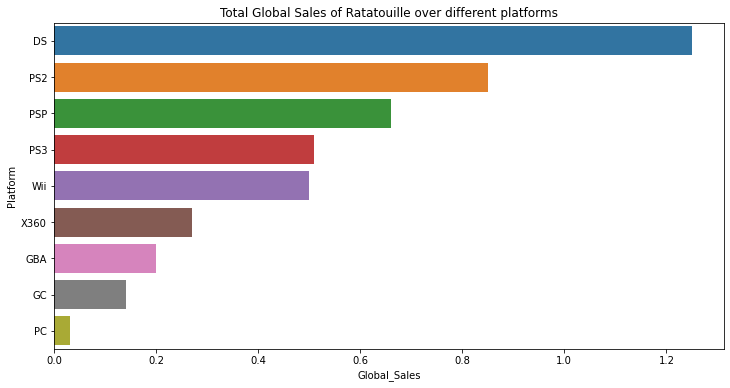

In [31]:
# Looking at Ratarouille

plt.figure(figsize=(12,6))
plt.title("Total Global Sales of Ratatouille over different platforms")
sns.barplot(data=vg_data[vg_data.Name == 'Ratatouille'], x='Global_Sales', y='Platform')

As we can see, individual games have largely different platform sales.

Need for Speed: Most Wanted is a racing game more likely to be marketed to teenagers and young adults. Playstation and Xbox consoles tend to be favoured by this demographic, hence the higher sales.

Monopoly is a much more casual game that appeals to a crowd who are more likely to not be as interested in video games. Those who don't frequently play video games are not likely to own a specific games console, but are likely to own a PC. Thus, this could explain the high PC sales for Monopoly. Additionally, the Wii was a popular console for families which could also explain its popularity on that console.

Ratatouille, on the other hand, is a video game based off of the Pixar family film, hence the popularity on the DS (a console that appeals to all ages, especially younger audiences). Notably, Ratatouille sold surprisingly well on portable game consoles compared to the other two.

Now let's compare all the multiplatform games to their global sales. Since the number of sales will be drastically different, we will compare their means.

In [98]:
# Refitting Data

multiplatform_and_total_sales = pd.concat([multiplatform_titles.groupby('Platform').mean().loc[:, 'Global_Sales'], vg_data.groupby('Platform').mean().loc[:, 'Global_Sales']], axis = 1)
multiplatform_and_total_sales_data = multiplatform_and_total_sales.reset_index()
multiplatform_and_total_sales_data.columns = ["Platform" ,"Multiplatform Sales", "Total Sales"]
multiplatform_and_total_sales_data = pd.melt(multiplatform_and_total_sales_data, id_vars=['Platform'])
multiplatform_and_total_sales_data.columns = ["Platform", "Multiplatform_or_Total", "Global_Sales"]
multiplatform_and_total_sales_data

,Platform,Multiplatform_or_Total,Global_Sales
0,2600,Multiplatform Sales,1.786250
1,3DS,Multiplatform Sales,0.355745
2,DC,Multiplatform Sales,0.330000
3,DS,Multiplatform Sales,0.362147
4,GB,Multiplatform Sales,3.300526
...,...,...,...
57,3DO,Total Sales,0.033333
58,GG,Total Sales,0.040000
59,PCFX,Total Sales,0.030000
60,SCD,Total Sales,0.311667


<AxesSubplot:title={'center':'Mean Sales for Multiplatform and Total Video Games by Platform'}, xlabel='Global_Sales', ylabel='Platform'>

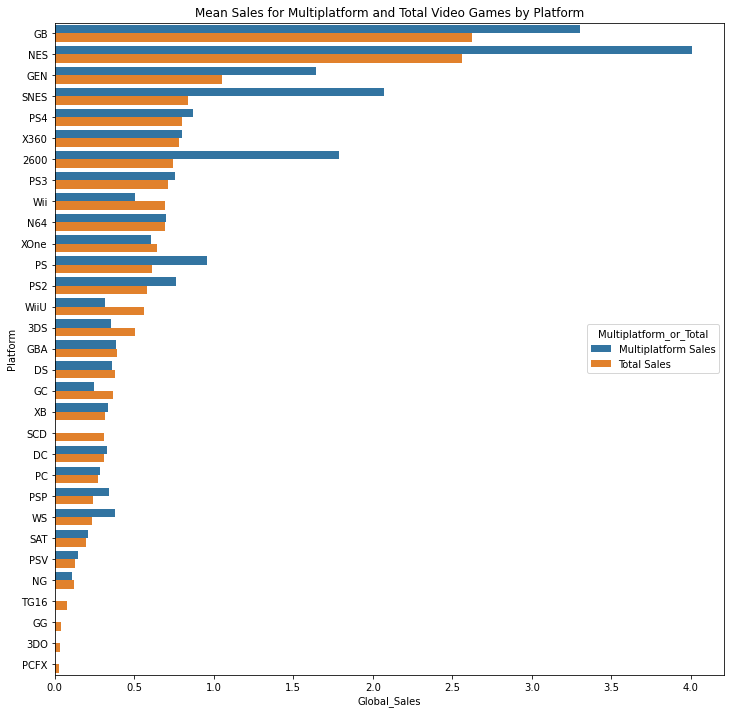

In [100]:
plt.figure(figsize=(12,12))
plt.title("Mean Sales for Multiplatform and Total Video Games by Platform")
sns.barplot(data=multiplatform_and_total_sales_data, x='Global_Sales', y='Platform', hue='Multiplatform_or_Total', order=vg_data.groupby("Platform").mean().sort_values("Global_Sales", ascending=False).index)

Some interesting trends start to appear.
The Gameboy, NES, Sega Genesis and Atari 2600 have notably higher mean sales on multiplatform releases compared to total sales. Notably, these are all platforms in the earlier generation of video game consoles. There could be a few possible reasons for this:
<ul>
    <li>The games that sold best, sold well due to being on multiple platforms. Whether it be due to word of mouth marketing or perhaps games developed by larger comapines tended to be of higher quality and they could afford multiple console releases.</li>
    <li>There was a significant amount of low selling games that were exclusive to these platforms.</li>
    <li>When a game was released on multiple platforms, these were the most popular choices when it came to decide which platform to purchase it on.</li>
</ul>

On the other hand, the Gamecube, Wii, WiiU and 3DS all sold notably fewer games on their respective consoles when there were multiplatform games. Notably, these are all Nintendo consoles. There are also a few possible explanations for this:
<ul>
    <li>For games that released on multiple platforms, these were not the preferred console choices, perhaps due to less powerful hardware compared to competitors or due to a difference in target audience.</li>
    <li>Nintendo are known for having many of their popular series be exclusive only to Nintendo consoles, thus the higher mean total sales.</li>
</ul>

These results lead one to consider whether certain platforms would be favoured for specific genres, developers or even regions.

<h3> 2.3 Genre</h3>

<h4>What genres are in the dataset?</h4>

Let's have a look at the genre of the video games in the dataset first.

In [34]:
vg_data.Genre.value_counts()

Action          3307
Sports          2306
Misc            1697
Role-Playing    1483
Shooter         1296
Adventure       1291
Racing          1225
Platform         878
Simulation       855
Fighting         837
Strategy         672
Puzzle           569
Name: Genre, dtype: int64

The video games in this database are divided into 12 different genres. These general characterisations of each genre are expalined below:

<ul>
    <li><b>Action</b> - Precision and reaction based challenges.</li>
    <li><b>Adventure</b> - Exploration and a story driven narritive. Puzzles are often incorporated too.</li>
    <li><b>Fighting</b> - Combat between usually two players where unique technical inputs are often required.</li>
    <li><b>Platform</b> - Movement, such as jumping and climbing, is used to traverse an environment.</li>
    <li><b>Puzzle</b> - Problem solving and various logical challenges. Often incorporated into other genres.</li>
    <li><b>Racing</b> - Driving some form of transportation either against others or against time</li>
    <li><b>Role-playing</b> - Progression based systems where a player character becomes increases in strength, often through a story.</li>
    <li><b>Shooter</b> - Ranged weaponry, most commonly guns, in combat to damage opponents. Opponents can be other players or AI controlled opponents.</li>
    <li><b>Simulation</b> - Systems which aim to simulate reality (real or fictional).</li>
    <li><b>Sports</b> - Recreations of sports but in a video game.</li>
    <li><b>Strategy</b> - Skillful and careful planning based gameplay to achieve an objective.</li>
    <li><b>Misc</b> - Any game that does not fall into any of the above categories. Notably, music games and party games fall in this category.</li>
</ul>

<h4>How many video games of each genre are there in the dataset?</h4>

<AxesSubplot:title={'center':'Count of Video Games by Genre'}, xlabel='count', ylabel='Genre'>

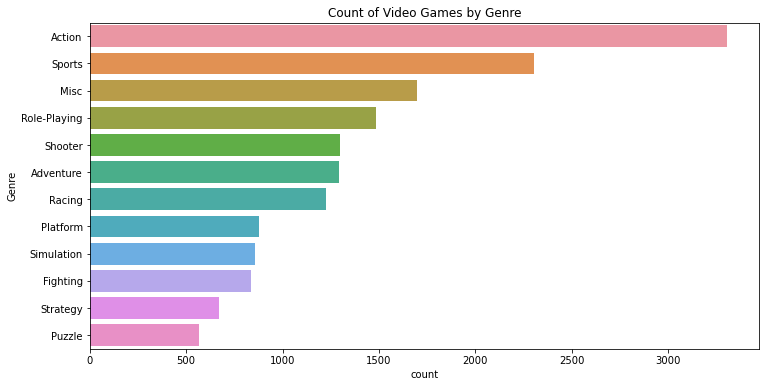

In [35]:
# Counting releases of video games by genre

plt.figure(figsize=(12,6))
plt.title("Count of Video Games by Genre")
sns.countplot(y='Genre', data=vg_data, order=vg_data.Genre.value_counts().index)

We can see how the action genre has the highest number of releases showing how ubiqutous it is in the video game industry.


Notably, there is a large count of sports video games as many series in the sports genre tends to have annual releases.

<AxesSubplot:title={'center':'Counts of Video Games occurring in top 100 best selling games'}, xlabel='count', ylabel='Genre'>

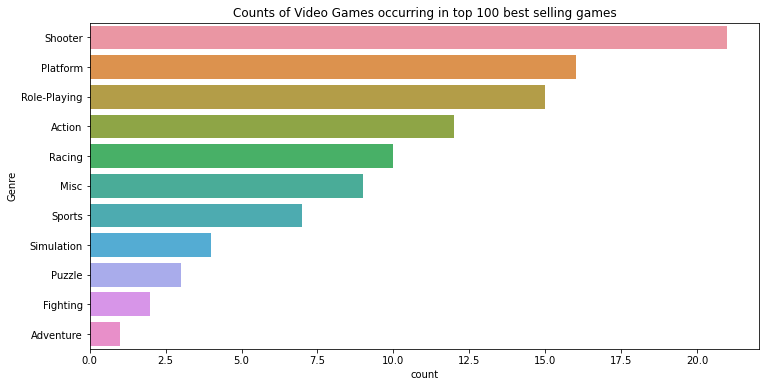

In [101]:
top_hundred_data = vg_data.sort_values('Global_Sales', ascending=False)[:100]

plt.figure(figsize=(12,6))
plt.title("Counts of Video Games occurring in top 100 best selling games")
sns.countplot(y='Genre', data=top_hundred_data, order=top_hundred_data.Genre.value_counts().index)

In the top 100 best selling video games, the distribution is different.

Shooters and platformers are now the highest counts compared to being 4th and 8th respectively.

Adventure games, while being 6th most common overall, have very few games in the top 100.

<h4>Genre and Sales</h4>

We will first investigate how genre and sales may relate.

<AxesSubplot:title={'center':'Total Global Sales of Video Games by Genre'}, xlabel='Global_Sales', ylabel='Genre'>

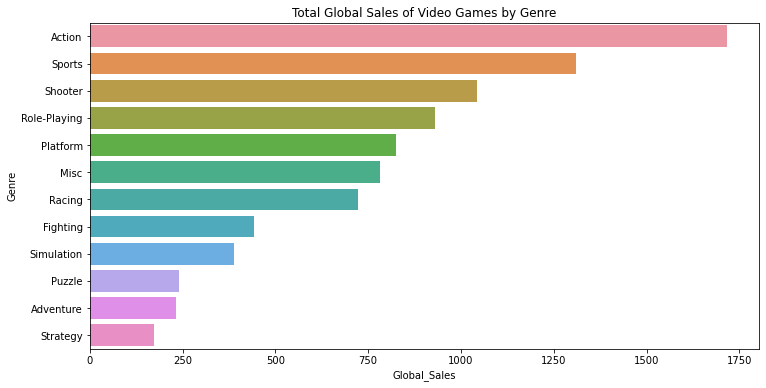

In [37]:
# Total sales by genre

plt.figure(figsize=(12,6))
plt.title("Total Global Sales of Video Games by Genre")
sns.barplot(data=vg_data.groupby('Genre', as_index=False).sum(), x='Global_Sales', y='Genre', order=vg_data.groupby('Genre', as_index=False).sum().sort_values('Global_Sales', ascending=False).Genre)

<AxesSubplot:title={'center':'Total Global Sales of Video Games by Genre'}, xlabel='Genre', ylabel='Global_Sales'>

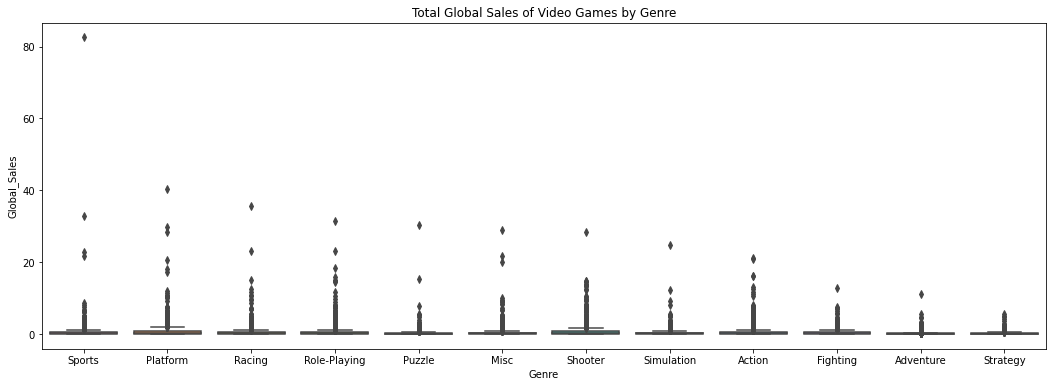

In [38]:
plt.figure(figsize=(18,6))
plt.title("Total Global Sales of Video Games by Genre")
sns.boxplot(data=vg_data, y='Global_Sales', x='Genre')

Wii sports is a rather large outlier, but even from this we can see how there tends to be a lot of top selling games in sports, platform and racing games. Notably, there are not many top selling video games in the Fighting, Adventure nor Strategy genre.


What about the rest of the pack? How does a game with sales closer to the average fare?

<AxesSubplot:title={'center':'Global Sales of Video Games by Genre which sold less than 10 million USD'}, xlabel='Genre', ylabel='Global_Sales'>

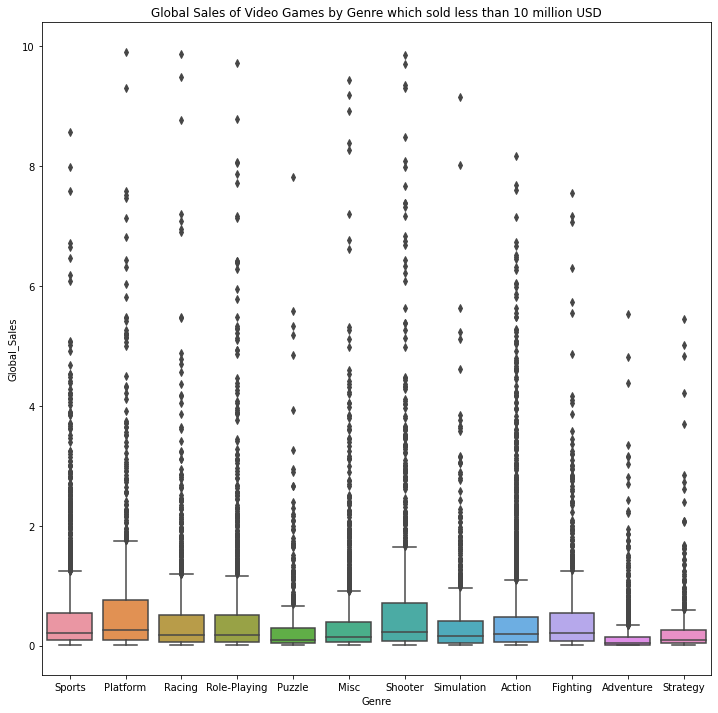

In [39]:
plt.figure(figsize=(12,12))
plt.title("Global Sales of Video Games by Genre which sold less than 10 million USD")
sns.boxplot(data=vg_data[vg_data.Global_Sales <= 10], y='Global_Sales', x='Genre', order=vg_data.groupby('Genre', sort=False)['Global_Sales'].max().index)

Again, platform and shooter games tend to do rather well. Notably, the average action game fares a lot better despite having considerable fewer outliers in sales.

Adventure, puzzle, simulation and strategy games seem to have slightly worse sales. This could imply that perhaps these genres have a much more niche audience and thus do not sell as well on average for a larger audience.

<h4> How about the average game in a genre? </h4>

<AxesSubplot:title={'center':'Mean Global Sales of Video Games by Genre'}, xlabel='Global_Sales', ylabel='Genre'>

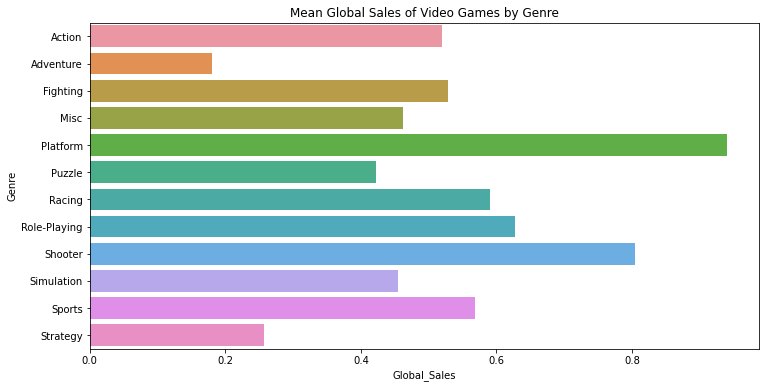

In [40]:
# Mean sales by genre

plt.figure(figsize=(12,6))
plt.title("Mean Global Sales of Video Games by Genre")
sns.barplot(data=vg_data.groupby('Genre', as_index=False).mean(), x='Global_Sales', y='Genre')

Shooters and platformers mean sales both perform rather well.

When looking at the mean, Action games tends to do averagely compared to the other genres. The action genre could be oversaturated in the video game market which results in a lot of video games that both sell a lot and sell very little.

Adventure and strategy games again both have rather low mean sales compared to the other genres, again reinforcing the idea that these genres may have a nicher audience.

<h4> Do certain genres sell better on certain platforms? </h4>

As discussed before, let's see if certain genres of video games sell better on certain platforms.

Firstly, we will ignore any platforms which have sales data in 3 or fewer genres.

In [41]:
# Create a pivot table, we will drop platforms without sales data in 3 or fewer genres

global_sales_genre_platform = vg_data.pivot_table(index='Genre', columns='Platform', values='Global_Sales', aggfunc=np.sum).dropna(axis=1, thresh=9)
global_sales_mean_genre_platform = vg_data.pivot_table(index='Genre', columns='Platform', values='Global_Sales', aggfunc=np.mean).dropna(axis=1, thresh=9)

<AxesSubplot:title={'center':'Heatmap of Genre and Platform with Total Sales'}, xlabel='Platform', ylabel='Genre'>

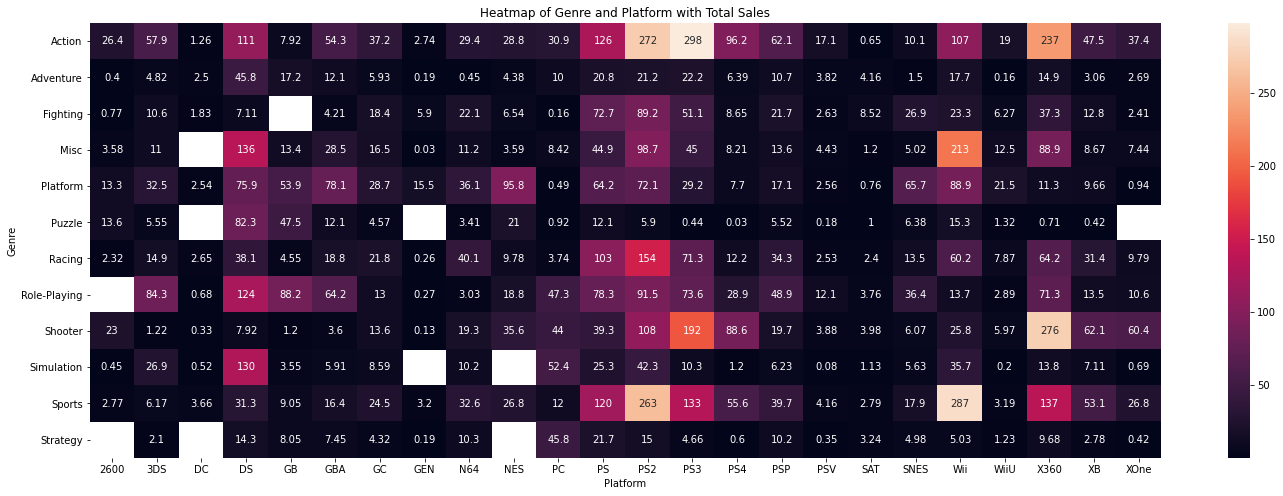

In [102]:
# Heat map of genres & platform
plt.figure(figsize=(24,8))
plt.title("Heatmap of Genre and Platform with Total Sales")

sns.heatmap(data=global_sales_genre_platform, annot=True, fmt=".3g")

<AxesSubplot:title={'center':'Heatmap of Genre and Platform with Mean Sales'}, xlabel='Platform', ylabel='Genre'>

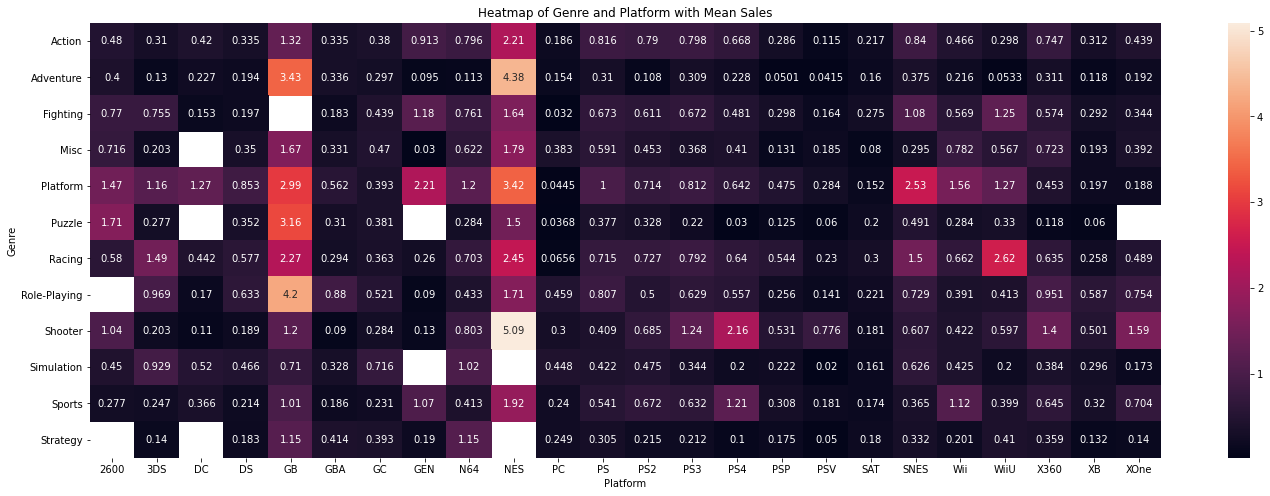

In [103]:
# Heat map of genres & platform
plt.figure(figsize=(24,8))
plt.title("Heatmap of Genre and Platform with Mean Sales")

sns.heatmap(data=global_sales_mean_genre_platform, annot=True, fmt=".3g")

Action games tend to be sell more in total on home consoles. Namely Sony consoles & Microsoft consoles.

The Miscellaneous genre sells a lot more in total on the DS and Wii. This could be due to the miscellaneous genre having a lot of party or casual games. As these consoles have a much broader and appeal, especially to families, this genre tends to do better.

Nintendo consoles largely dominate the platform genre sales, with the Sega Genesis being a slight exception. This is likely due to popularity of the Mario series.
Portable consoles like the Gameboy and Nintendo DS have surprisingly high sales in the role-playing genre. This is likely due to the popularity of Pokemon.

Racing games in total sold very well on the PS2, but interestingly the mean sales are much higher for the Gameboy, NES and WiiU. This suggests that while in general racing games sell better on the PS2, the racing games on these other consoles sell very well while the market could be little oversaturated on the PS2.

<h3> 2.4 Rating Exploration </h3>

<h4> What age ratings do we have? </h4>

In [44]:
vg_data.Rating.value_counts()

E       3921
T       2904
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: Rating, dtype: int64

A short explanation taken form the ESRB website for each rating:

<ul>
    <li><b>E</b> - Everyone. Content generally suitable for all ages.</li>
    <li><b>E10+</b> - Everyone 10+. Content generally suitable for ages 10 and up.</li>
    <li><b>T</b> - Teen. Content generally suitable for ages 13 and up.</li>
    <li><b>M</b> - Mature. Content generally suitable for ages 17 and up.</li>
    <li><b>AO</b> - Adult Only. Content generally suitable for adult ages 18 and up.</li>
</ul>

A few less common ones are explained below:
<ul>
    <li><b>EC</b> - Early Childhood. Content generally suitable for ages 3 and older. Contains no material that parents would find inappropriate.</li>
    <li><b>K-A</b> - Kids to Adults. The previous name for the rating category 'E' for 'Everyone'.</li>
    <li><b>RP</b> - Rating Pending. The game has not yet been assigned a final rating. Replaced once the rating has been assigned</li>
</ul>
K-A was renamed to E in 1998. EC was also discontinued in 2018 due to lack of use as E was also applicable to titles with the rating EC. Thus, for our exploration and analysis we will be relabeling these games to have the rating E to be consistent with modern ratings.
<br>
We also note that game ratings were only introduced in 1994 so many games before that era may not have a rating.

In [45]:
vg_data.replace(['K-A', 'EC'], 'E', True)

As for the games with RP, we will manually find out these ratings and correct them ourselves.

In [46]:
vg_data.loc[vg_data.Rating == 'RP']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14272,Supreme Ruler: Cold War,PC,2011.0,Strategy,Paradox Interactive,0.0,0.03,0.0,0.01,0.03,63.0,12.0,6.8,27.0,BattleGoat Studios,RP


Supreme Ruler: Cold War was given an E10+ rating.

Thus, we reassign their ratings as stated.

In [105]:
vg_data.loc[14272,'Rating'] = 'E10+'

There is only one videogame with the rating Adults Only in our database, Grand Theft Auto: San Andreas.

This game was initially given a rating of M in October 2004, but later was reevaluated to an AO rating in July 2005. The first version of the game was discontinued and a new version was released with the offending scenes removed allowing the game to again have its M rating. Notably, the scenes that caused the controversy and eventual revisiting of its rating were scenes that are not usually accessible in the game, being completely disabled in its release.

All other entires of this game have its rating as M and for the purposes of this exploration and analysis, this rating will also be changed.

In [48]:
vg_data.loc[vg_data.Rating == "AO"]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,Take-Two Interactive,1.26,0.61,0.0,0.09,1.95,93.0,58.0,8.6,118.0,Rockstar North,AO


In [49]:
vg_data.loc[vg_data.Name == 'Grand Theft Auto: San Andreas']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95.0,80.0,9.0,1588.0,Rockstar North,M
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,Take-Two Interactive,1.26,0.61,0.00,0.09,1.95,93.0,58.0,8.6,118.0,Rockstar North,AO
2115,Grand Theft Auto: San Andreas,PC,2005.0,Action,Take-Two Interactive,0.00,0.93,0.00,0.04,0.97,93.0,47.0,8.9,1841.0,Rockstar North,M
10312,Grand Theft Auto: San Andreas,X360,2008.0,Action,Take-Two Interactive,0.08,0.02,0.00,0.01,0.11,NaN,NaN,7.5,46.0,War Drum Studios,M


In [50]:
vg_data.loc[875,'Rating'] = 'M'

<AxesSubplot:title={'center':'Count of Video Game Ratings'}, xlabel='count', ylabel='Rating'>

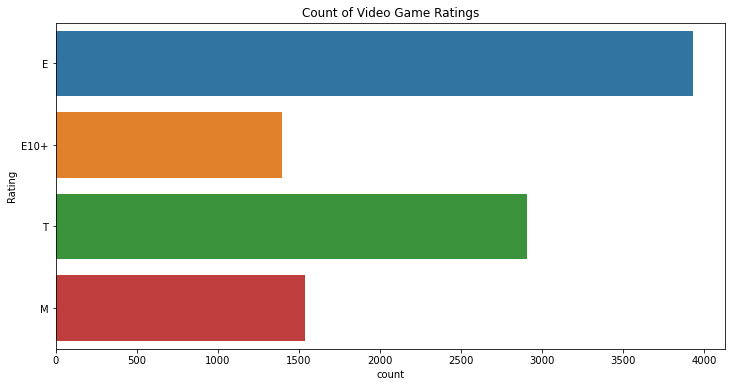

In [107]:
rating_order = ['E', 'E10+', 'T', 'M']

plt.figure(figsize=(12,6))
plt.title("Count of Video Game Ratings")
sns.countplot(data=vg_data, y=vg_data.Rating, order=rating_order)

We can see how E is the most common rating followed up closely with T.

<h4>How does Rating affect sales? </h4>

<AxesSubplot:title={'center':'Count of Video Game Ratings occurring in top 100 best selling games'}, xlabel='count', ylabel='Rating'>

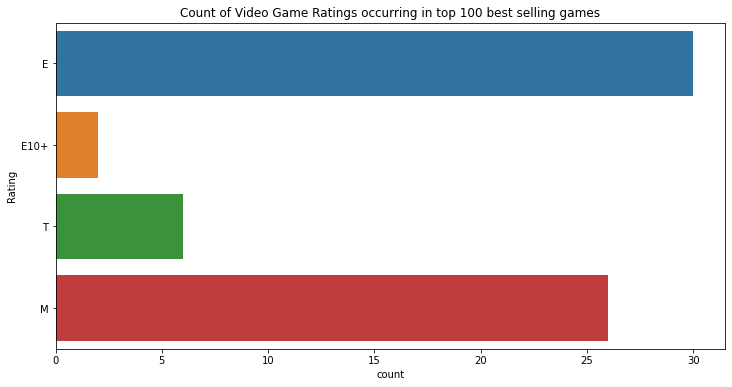

In [52]:
plt.figure(figsize=(12,6))
plt.title("Count of Video Game Ratings occurring in top 100 best selling games")
sns.countplot(data=vg_data.sort_values('Global_Sales', ascending=False)[:100], y='Rating', order=rating_order)

<AxesSubplot:title={'center':'Total Global Sales of Video Games by Rating'}, xlabel='Global_Sales', ylabel='Rating'>

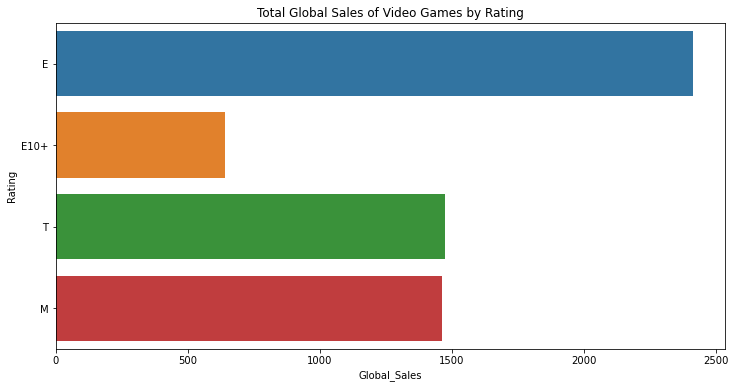

In [109]:
# Total sales by Rating

plt.figure(figsize=(12,6))
plt.title("Total Global Sales of Video Games by Rating")
sns.barplot(data=vg_data.groupby('Rating', as_index=False).sum(), x='Global_Sales', y='Rating', order=rating_order)

<AxesSubplot:title={'center':'Mean Global Sales of Video Games by Rating'}, xlabel='Global_Sales', ylabel='Rating'>

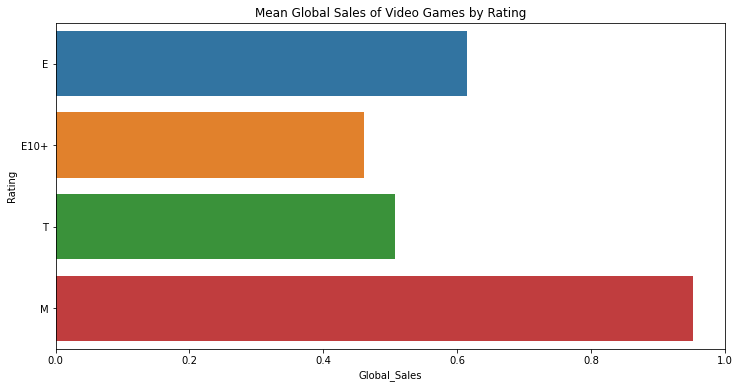

In [56]:
# Mean sales by Rating

plt.figure(figsize=(12,6))
plt.title("Mean Global Sales of Video Games by Rating")
sns.barplot(data=vg_data_rating.groupby('Rating', as_index=False).mean(), x='Global_Sales', y='Rating', order=rating_order)

Mature rated games have a much higher mean value for Global Sales than all the other ratings.

Do ratings perform better or worse on certain consoles?

In [111]:
# Create a pivot table, we will drop platforms without sales data in 3 or less genres

global_sales_rating_platform = vg_data.pivot_table(index='Rating', columns='Platform', values='Global_Sales', aggfunc=np.sum)
global_sales_mean_rating_platform = vg_data.pivot_table(index='Rating', columns='Platform', values='Global_Sales', aggfunc=np.mean)

global_sales_rating_platform.index = pd.CategoricalIndex(global_sales_rating_platform.index, categories=rating_order)
global_sales_rating_platform.sort_index(level=0, inplace=True)

global_sales_mean_rating_platform.index = pd.CategoricalIndex(global_sales_mean_rating_platform.index, categories=rating_order)
global_sales_mean_rating_platform.sort_index(level=0, inplace=True)

<AxesSubplot:title={'center':'Heatmap Platform and Genre Mean'}, xlabel='Rating', ylabel='Platform'>

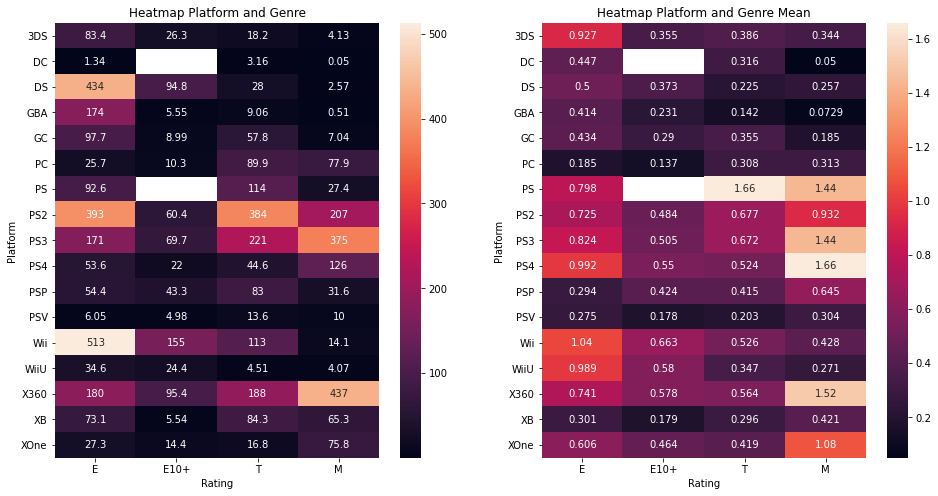

In [112]:
# Heat map of genres & platform
fig, axes_rating_platform_heatmap = plt.subplots(1, 2, figsize=(16,8))

axes_rating_platform_heatmap[0].set_title("Heatmap Platform and Genre")
sns.heatmap(data=global_sales_rating_platform.transpose(), ax=axes_rating_platform_heatmap[0], annot=True, fmt=".3g")

axes_rating_platform_heatmap[1].set_title("Heatmap Platform and Genre Mean")
sns.heatmap(data=global_sales_mean_rating_platform.transpose(), ax=axes_rating_platform_heatmap[1], annot=True, fmt=".3g")

Some clear patterns can be seen.

Mature games sell the best on Playstation consoles and also reasonably well on the Xbox consoles. They notably perform quite poorly on most other consoles (with PC being the exception).

Teen games follow a similar trend as mature games but to a lesser degree. Sales in the teen rating are much closer with fewer consoles at the extremes but they still do tend to sell a little better on Playstation consoles.

E and E10+ rated games sell reasonably on most consoles, though they seel by far the best on Nintendo consoles, notable the Wii ands DS. They also sell rather well on Playstation consoles too. PC notably does not sell E rated games nearly as well as every other console, especially when compared with the mean Global Sales metric.

These are inline with the general market these platforms tend to be for. Sony and Microsoft tend to market the Playstation and Xbox line of consoles to older audiences while Nintendo tend to market their consoles to be much broader in appeal.

As an aside from sales, let's look at the relation ship between genres and rating.

<AxesSubplot:title={'center':'Count plot of genre and rating'}, xlabel='Genre', ylabel='count'>

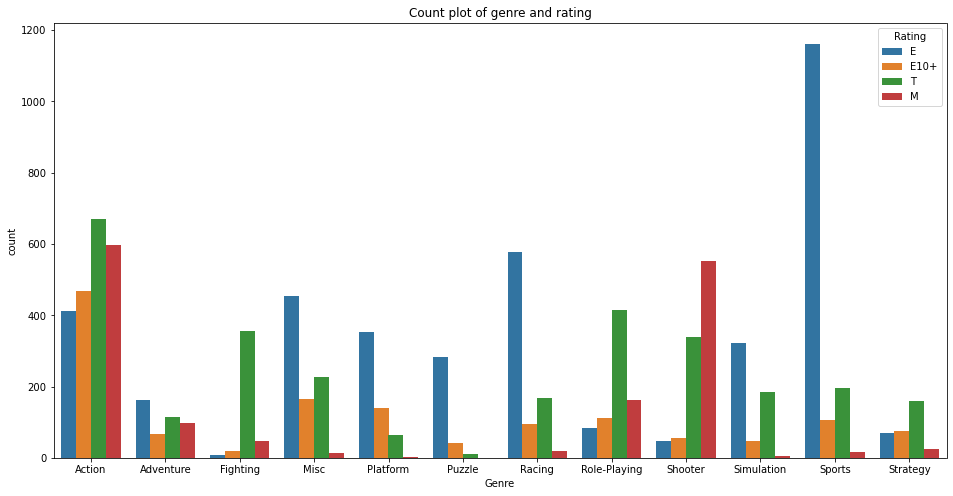

In [59]:
# Count plot of genre and rating.

plt.figure(figsize=(16,8))
plt.title("Count plot of genre and rating")
sns.countplot(data=vg_data, x='Genre', hue='Rating', order=sorted(vg_data.Genre.dropna().unique()), hue_order=rating_order)

There are clear correlations for games in a specific genre to receive a rating.

Adventure games are rather even in representation.

Platformers, puzzle, racing, simulation, sports and misc games all have strong biases to E rated games.

Fighting, RPG and strategy games are heavily biased towards T ratings.

Action is slightly biased towards T and M ratings but is rather even.

Shooters are the only genre heavily biased towards mature ratings. This makes sense due to their tendency to include violent themes.

<h3> 2.5 Developers</h3>

<h4>Which video game developers are in the dataset?</h4>

In [60]:
vg_data.Developer.value_counts()

Ubisoft                              201
EA Sports                            169
EA Canada                            164
Konami                               158
Capcom                               137
                                    ... 
Volition Inc., Reactor Zero            1
Left Field Productions, Zoo Games      1
Societe Pollene                        1
EA Tiburon, n-Space                    1
Beluga Computer                        1
Name: Developer, Length: 1680, dtype: int64

There are 1680 developers in our dataset, though most of the developers only have a few games in the dataset.

In [61]:
sum(vg_data.Developer.value_counts() == 1)

645

In [62]:
sum(vg_data.Developer.value_counts() <= 3)

1092

As you can see, around 38% only have 1 game in the dataset and 65% of them have 3 or fewer.

Let's have a look at the top 20 developers who have created the most video games.

<AxesSubplot:title={'center':'Count of Video Games by Top 20 Developers'}, xlabel='count', ylabel='Developer'>

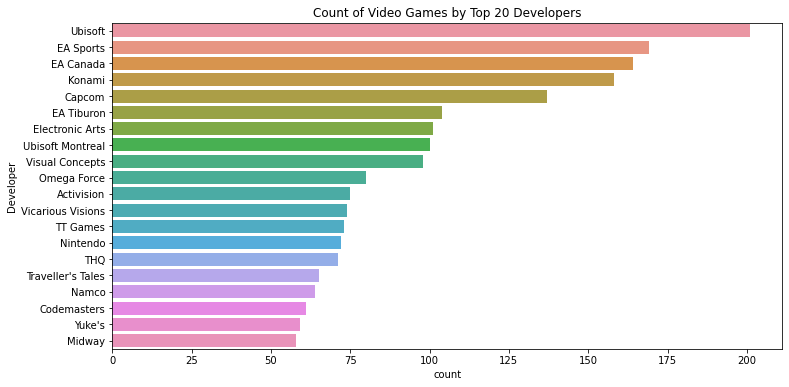

In [63]:
# Counting releases of video games by Developer

plt.figure(figsize=(12,6))
plt.title("Count of Video Games by Top 20 Developers")
sns.countplot(y='Developer', data=vg_data, order=vg_data.Developer.value_counts().iloc[:20].index)

We note that quite a few companies are repeated multiple times, for example:
- Ubisoft Montreal is a studio of Ubisoft
- EA Canada, EA Tiburon & Codemasters are all studios under Electronic Arts with EA Sports being a division of Electronics Arts
- Traveller's Tales are a subsidiary of TT Games
- Vicarious Visions was acquired by Activision in 2004 (and merged into Blizzard Entertainment in 2021)

We will keep this in mind for our analysis.

<h4>Developers and Sales </h4>

Let's have a closer look at the top 20 developers by total sales

In [64]:
top_developers_data = vg_data.groupby("Developer", as_index=False).sum().sort_values('Global_Sales', ascending=False)[:20]

<AxesSubplot:title={'center':'Top 20 Total Global Sales by Developer'}, xlabel='Global_Sales', ylabel='Developer'>

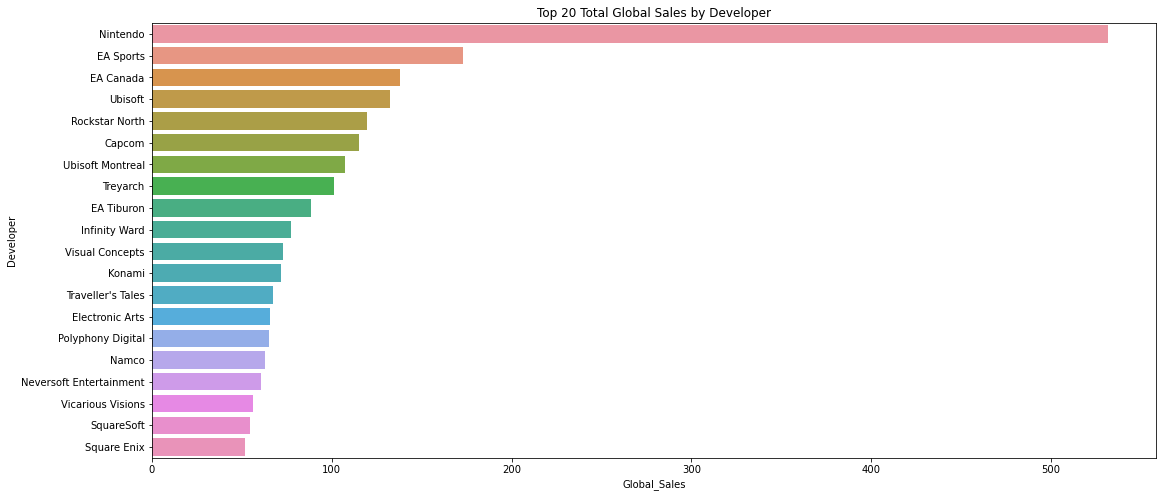

In [65]:
plt.figure(figsize=(18,8))
plt.title("Top 20 Total Global Sales by Developer")
sns.barplot(data=top_developers_data , x='Global_Sales', y='Developer')

<AxesSubplot:title={'center':'Top 20 Total Global Sales by Developer'}, xlabel='Global_Sales', ylabel='Developer'>

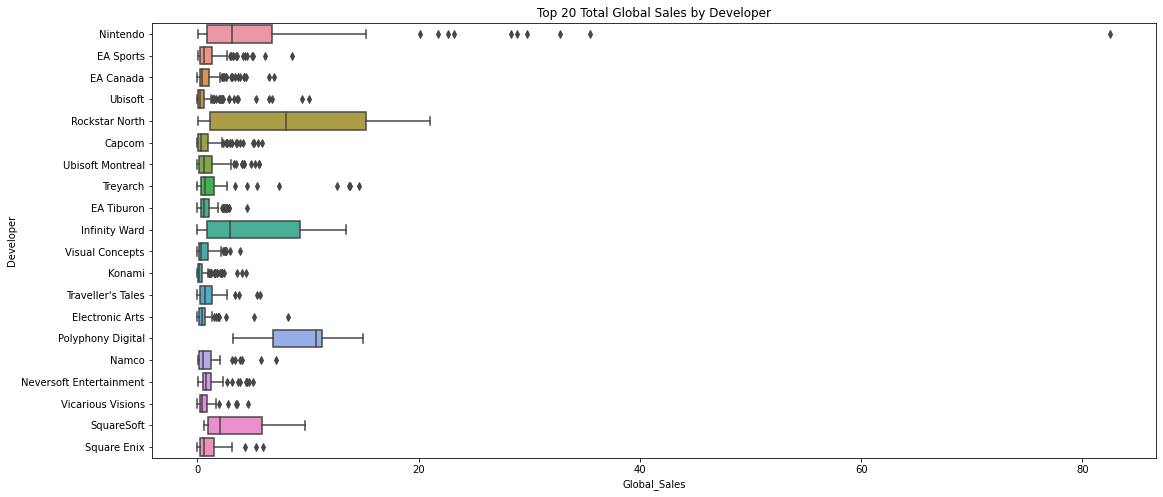

In [66]:
plt.figure(figsize=(18,8))
plt.title("Top 20 Total Global Sales by Developer")
sns.boxplot(data=vg_data[vg_data['Developer'].isin(top_developers_data['Developer'].values)] , x='Global_Sales', y='Developer', order=top_developers_data['Developer'])

Nintendo have considerably higher global sales than every other company. Part of this is due to other companies having multiple developer teams with different names. For example, Electronic Arts have many subsidiaries that can be seen with EA in the title.

If we consider the sum of all developers under EA, we find that they actually have higher total sales than Nintendo.

In [67]:
vg_data.dropna().loc[vg_data.Developer.str.contains(r"\b(EA|Electronic Arts)\b",case=False , regex=True).dropna()].Global_Sales.sum()

c:\users\arlen\appdata\local\programs\python\python38\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


590.33

In [68]:
vg_data.dropna().loc[vg_data.Developer.str.contains(r"\b(Nintendo)\b",case=False , regex=True).dropna()].Global_Sales.sum()

c:\users\arlen\appdata\local\programs\python\python38\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


551.57

We can see that the total sum of all global sales by any developer with EA or Electronic Arts in their name is 590.33 million USD compared to Nintendo's 551,57 million USD

<h4> Which developers consistently make top selling games? </h4>

In [69]:
vg_developer_counts = vg_data.Developer.value_counts()
frequent_developers_data = vg_data.loc[vg_data.Developer.isin(vg_developer_counts.index[vg_developer_counts.gt(5)])]

<AxesSubplot:title={'center':'Top 20 Mean Global Sales by Developer'}, xlabel='Global_Sales', ylabel='Developer'>

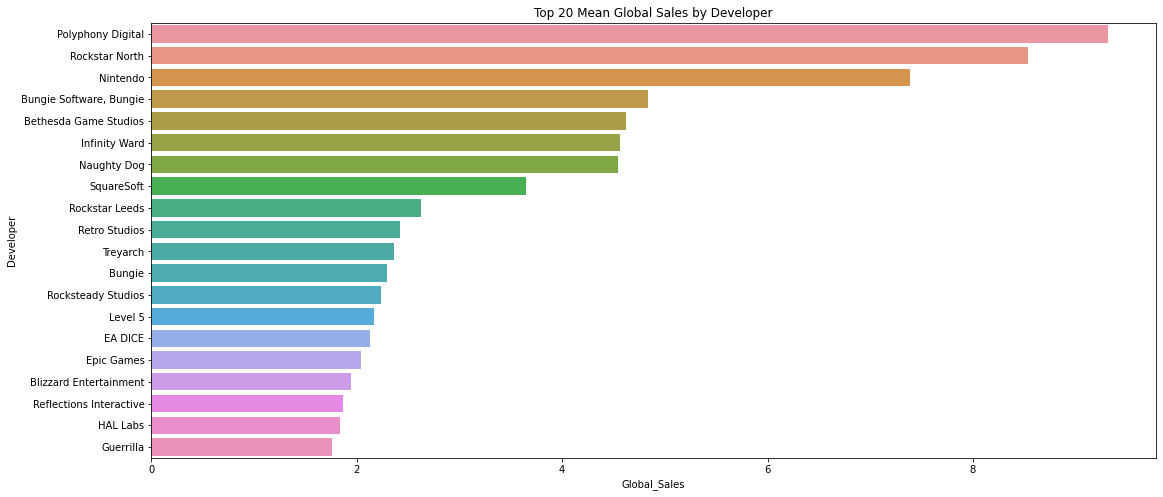

In [70]:
plt.figure(figsize=(18,8))
plt.title("Top 20 Mean Global Sales by Developer")
sns.barplot(data=frequent_developers_data.groupby("Developer", as_index=False).mean().sort_values('Global_Sales', ascending=False)[:20] , x='Global_Sales', y='Developer')

We add in the clause when looking at mean global sales by developer that they must have at least 5 games in the database. This allows us to see developers who can consistently create top selling games rather than ones who have created one game that sold well.

Polyphony Digital, Rockstar North and Nintendo are in at the top by quite a margin.

One possible reason could be that the developers at the top of the list have all created popular series. Thus, if one video game in the series sold well, it is reasonable that other video games, often sequels, would sell well too.

We can see from the top six developers, all have one or more popular series:
- Polyphony Digital created the Gran Turismo series
- Rockstar created the Grand Theft Auto series
- Nintendo created the Pokemon series
- Bungie created the Halo series and the Destiny series
- Bethesda created the Elder Scrolls series and the Fallout series.

As the developers do not have any other games in this database, in turn their mean global sales is rather high.
Nintendo is an exception in this case, while the others have no more than 10 games on the list, Nintendo have 72.

<h4> What age rating do the video games from these developers have? </h4>

Interestingly, a large proportion of these top selling developers create teen and mature rated games. Nintendo appears to be more of an exception to the rule accounting for 61% of the E and E10+ rated games created by Developers with high mean global sales.

In [71]:
high_mean_developers = frequent_developers_data.groupby("Developer", as_index=False).mean().sort_values('Global_Sales', ascending=False)[:20].Developer
vg_data.loc[vg_data.Developer.isin(high_mean_developers)].Rating.value_counts()

M       106
T       106
E        92
E10+     19
Name: Rating, dtype: int64

In [72]:
vg_data.loc[vg_data.Developer == "Nintendo"].Rating.value_counts()

E       58
E10+    10
T        4
Name: Rating, dtype: int64

<h3> 2.6 Critic and User Score Exploration </h3>

We note that many games may not have a score from critics or users. We have chosen to ignore these video games for this exploration.

Critic scores are rated from 0 to 100 while user scores are rated from 0.0 to 10.0 making them directly comparable.

In [73]:
vg_data.Critic_Score.describe()

count    7982.000000
mean       68.997119
std        13.918755
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

In [74]:
vg_data.User_Score.describe()

count    7461.000000
mean        7.126900
std         1.498886
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: User_Score, dtype: float64

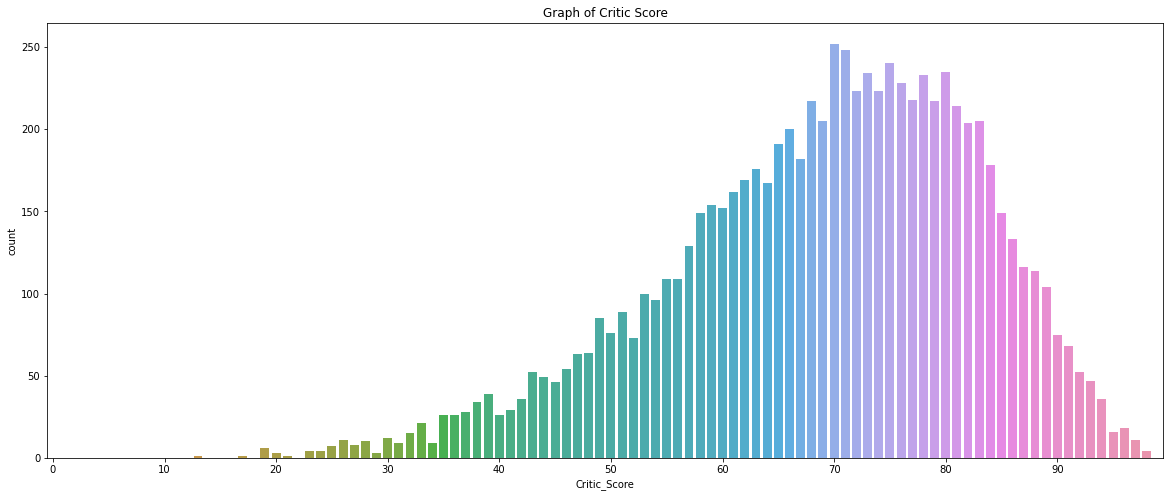

In [75]:
plt.figure(figsize=(20,8))
plt.title("Graph of Critic Score")
critic_score_count = sns.countplot(data=vg_data, x=vg_data.Critic_Score, order = range(0,100))
critic_score_count.set_xticks(range(0,100,10))

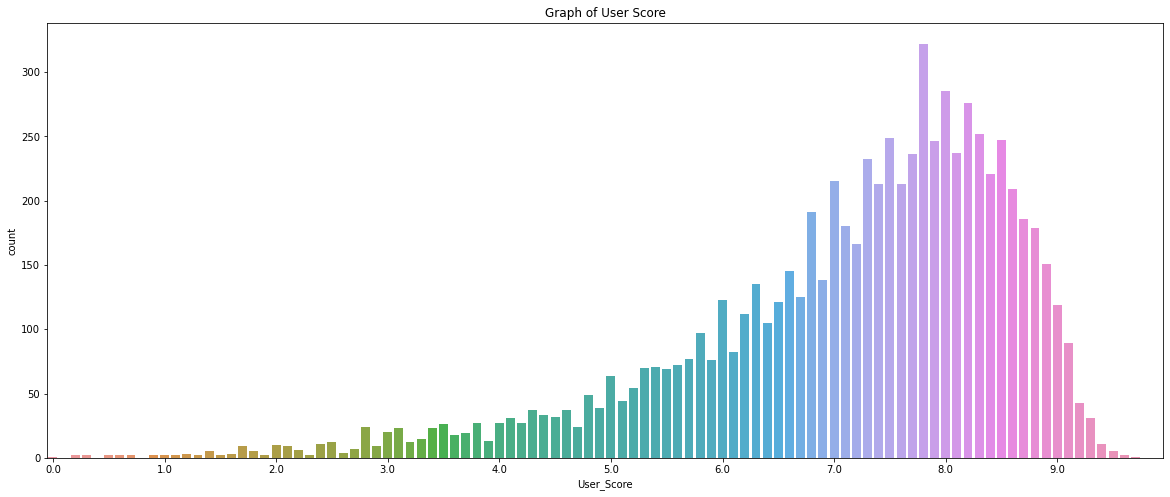

In [76]:
plt.figure(figsize=(20,8))
plt.title("Graph of User Score")
user_score_count = sns.countplot(data=vg_data, x=vg_data.User_Score, order = [x/10 for x in range(0,100)])
user_score_count.set_xticks(range(0,100,10))

We can see both Critics and Users Score has a negative skew with the Users Score having a larger negative skew. This is due to users tend to be more willing to give lower scores as minimum score for critics is 13 with the minimum for users being 0.

We can also see interesting patterns, especially with user scores, certain numbers are heavily favoured. Integers like 6.0, 7.0 and 8.0 tend to be given more frequently than others. Interestingly, 7.8 is the mode for user scores despite it not being an integer.

<h4>Scores and Sales </h4>

Let's look at some scatter plots.

<AxesSubplot:title={'center':'Scatter graph of Users and Global Sales'}, xlabel='User_Score', ylabel='Global_Sales'>

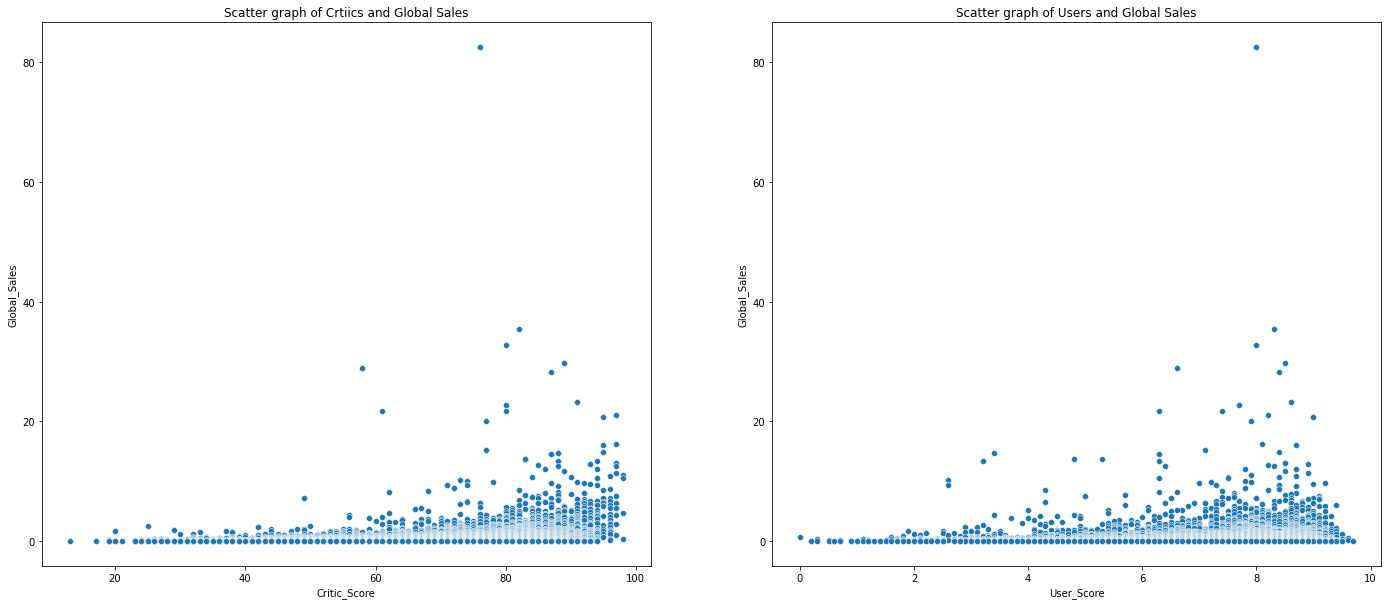

In [77]:
# Scatter graph of Critic Score and Global Sales. Uncapped

fig, axes_score_scatter = plt.subplots(1, 2, figsize=(24,10))

axes_score_scatter[0].set_title("Scatter graph of Crtiics and Global Sales")
sns.scatterplot(data=vg_data, x='Critic_Score', y='Global_Sales', ax=axes_score_scatter[0])

axes_score_scatter[1].set_title("Scatter graph of Users and Global Sales")
sns.scatterplot(data=vg_data, x='User_Score', y='Global_Sales', ax=axes_score_scatter[1])

We can see that in general games that sold more globally have received higher Critic and User scores. Interestingly, the distributions are more negatively skewed for Critics than users.

Does this still hold true for less popular games?

<AxesSubplot:title={'center':'Scatter graph of Users and Global Sales'}, xlabel='User_Score', ylabel='Global_Sales'>

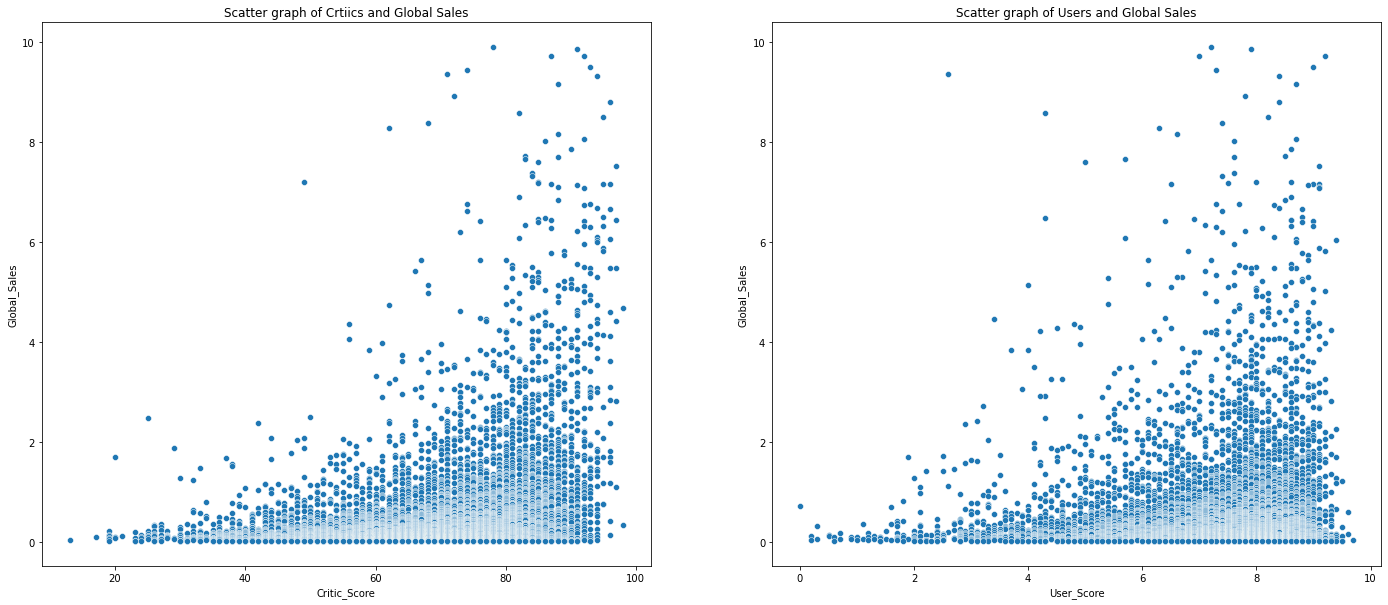

In [78]:
# Scatter graph of Critic Score and Global Sales. Uncapped

fig, axes_score_scatter_limited = plt.subplots(1, 2, figsize=(24,10))

axes_score_scatter_limited[0].set_title("Scatter graph of Crtiics and Global Sales")
sns.scatterplot(data=vg_data[vg_data.Global_Sales <= 10], x='Critic_Score', y='Global_Sales', ax=axes_score_scatter_limited[0])

axes_score_scatter_limited[1].set_title("Scatter graph of Users and Global Sales")
sns.scatterplot(data=vg_data[vg_data.Global_Sales <= 10], x='User_Score', y='Global_Sales', ax=axes_score_scatter_limited[1])

Do certain genres get higher scores?

<AxesSubplot:title={'center':'Scatter graph of Users and Global Sales'}, xlabel='User_Score', ylabel='Genre'>

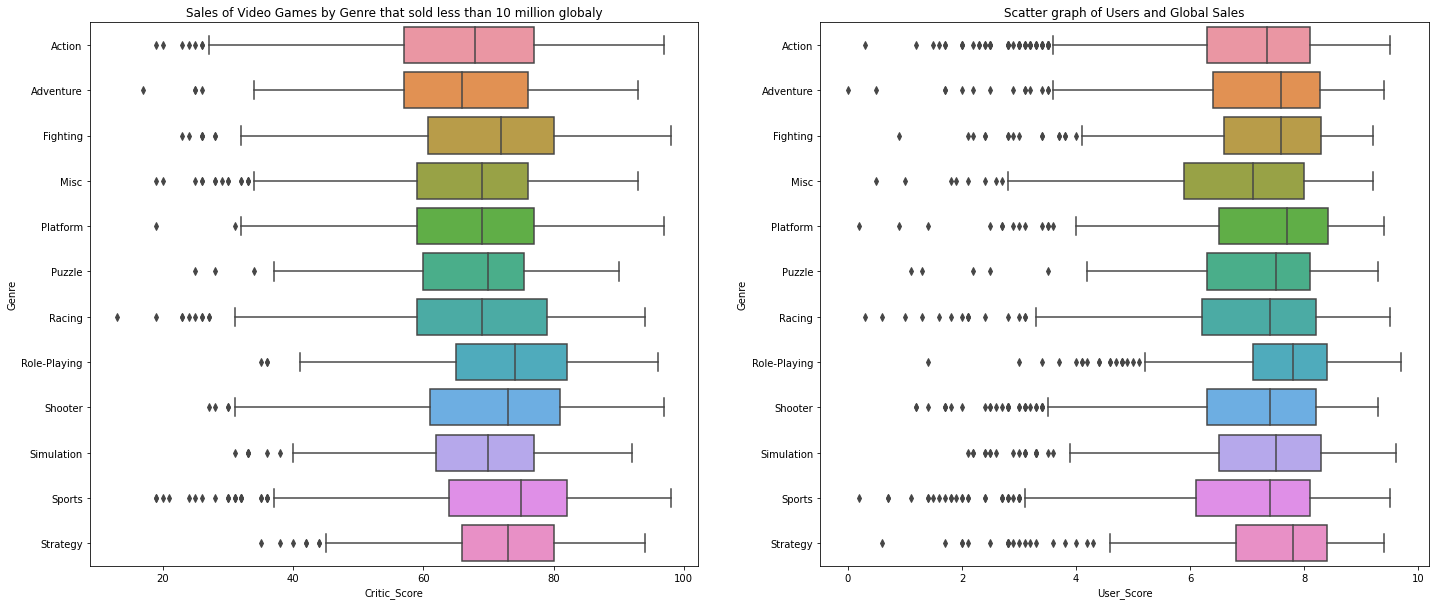

In [79]:
# Scatter graph of Critic Score and Global Sales. Uncapped

fig, axes_score_genre = plt.subplots(1, 2, figsize=(24,10))

sns.boxplot(data=vg_data[vg_data.Global_Sales <= 10], y='Genre', x='Critic_Score', order=sorted(vg_data.Genre.dropna().unique()), ax=axes_score_genre[0])
axes_score_genre[0].set_title("Sales of Video Games by Genre that sold less than 10 million globaly")

axes_score_genre[1].set_title("Scatter graph of Users and Global Sales")
sns.boxplot(data=vg_data[vg_data.Global_Sales <= 10], y='Genre', x='User_Score', order=sorted(vg_data.Genre.dropna().unique()), ax=axes_score_genre[1])

There are some general trends we can see with both the critics' scores and the users' scores.

Adventure games tend to receive worse scores for critics but above averaged for users.

RPGs tend to get high scores from both audiences (and a notable smaller spread in the IQR).

Sports tend to get slightly lower user scores but do above average for critics.

<h3> 2.7 Year Exploration </h3>

In [80]:
vg_data.Year_of_Release.describe()

count    16416.000000
mean      2006.489888
std          5.881148
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year_of_Release, dtype: float64

In [81]:
year_data = vg_data.loc[vg_data.Year_of_Release.notna()]

<AxesSubplot:title={'center':'Histogram of Year'}, xlabel='Year_of_Release', ylabel='count'>

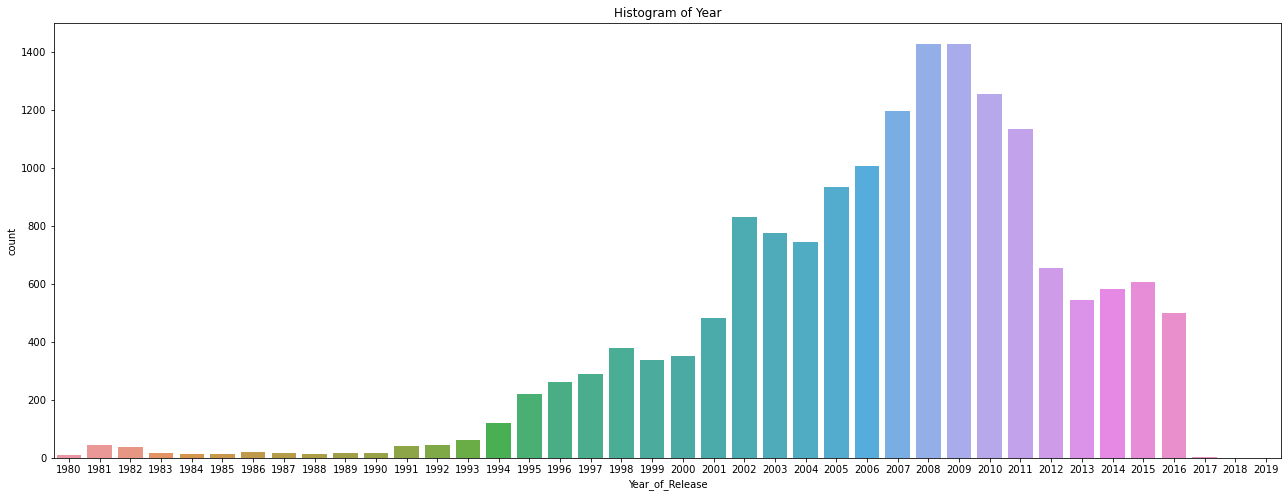

In [82]:
plt.figure(figsize=(22,8))
plt.title("Histogram of Year")
sns.countplot(data=year_data, x=year_data.Year_of_Release.astype(int), order = range(year_data.Year_of_Release.min().astype(int),year_data.Year_of_Release.max().astype(int)))

The database itself is from 2019 hence the lower values in recent years as the database may not have been entirely up to date. The video game industry is still a growing industry so in general there is an increasing trend.

Notably, you can see the effects of the video game crash in 1983 where there is proportionally quite a large drop of in the number of games released.

<h4>How does Year affect sales? </h4>

<AxesSubplot:title={'center':'Global sales by Year'}, xlabel='Year_of_Release', ylabel='Global_Sales'>

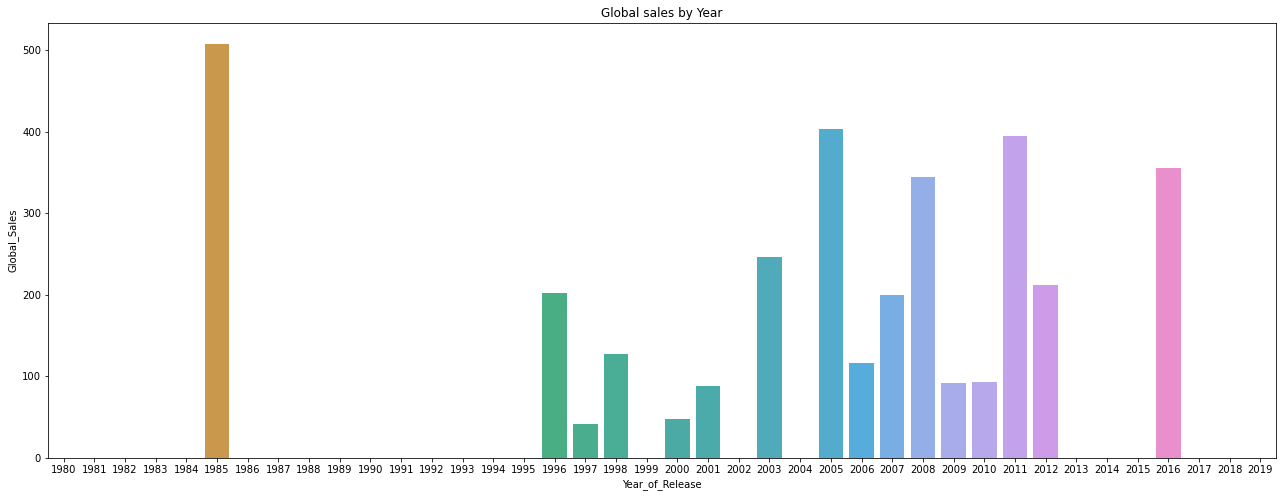

In [83]:
plt.figure(figsize=(22,8))
plt.title("Global sales by Year")
sns.barplot(x="Year_of_Release",
            y=year_data.groupby("Year_of_Release").Global_Sales.sum(),
            data=year_data,
            order = range(year_data.Year_of_Release.min().astype(int),year_data.Year_of_Release.max().astype(int)),
            ci = None)

<h3> 2.8 How does Region affect sales? </h3>

Do certain platforms sell better in different regions?

<AxesSubplot:title={'center':'Mean Sales in Each Region by Genre'}, xlabel='Platform'>

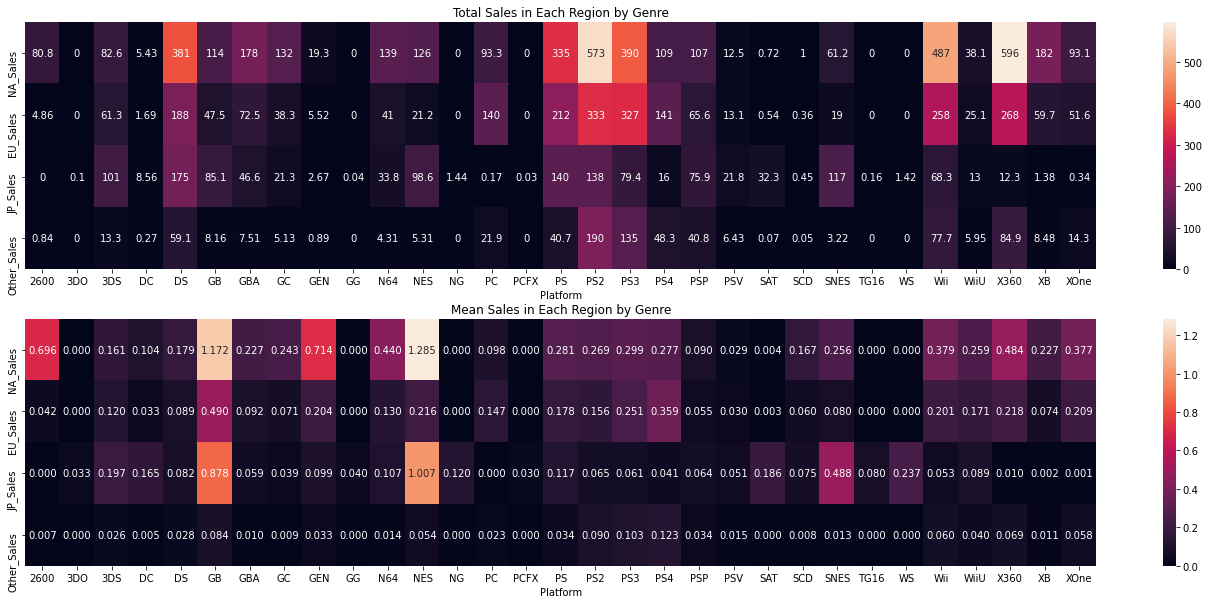

In [84]:
# Heat map of sales by genre & region
sale_columns = ('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales')
total_sales_platform = vg_data.groupby('Platform').sum().loc[:,sale_columns].dropna(axis=1, thresh=4)
mean_sales_platform=vg_data.groupby('Platform').mean().loc[:,sale_columns]

fig, axes_platform_heatmap = plt.subplots(2, 1, figsize=(24,10))

axes_platform_heatmap[0].set_title("Total Sales in Each Region by Genre")
sns.heatmap(data=total_sales_platform.transpose(), ax=axes_platform_heatmap[0], annot=True, fmt=".3g")

axes_platform_heatmap[1].set_title("Mean Sales in Each Region by Genre")
sns.heatmap(data=mean_sales_platform.transpose(), ax=axes_platform_heatmap[1], annot=True, fmt=".3f")

Certain regions do have a preference for certain platforms.

We note that certain platforms perform relatively well in all regions. The Nintendo DS and PS2 all have relatively high total sales across all regions. Similarly, the Nintendo Gameboy has high mean sales throughout all regions.

We can see some region specific preferences as well. The Atari 2600 and the Sega Genesis both have much higher mean sales in North America compared to other regions. Similarly, the SNES has much higher mean sales in Japan compared to other regions.

<AxesSubplot:title={'center':'Mean Sales in Each Region by Genre'}, ylabel='Genre'>

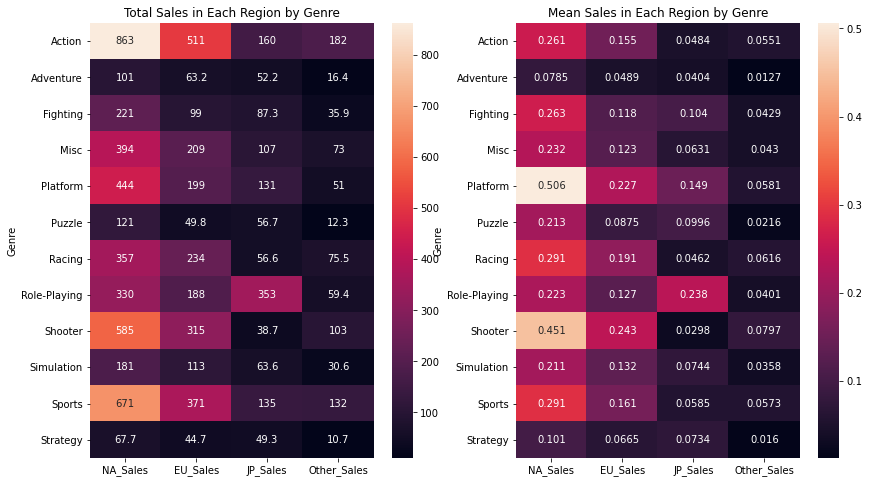

In [85]:
# Heat map of sales by genre & region
total_sales_genre=vg_data.groupby('Genre').sum().loc[:,sale_columns]
mean_sales_genre=vg_data.groupby('Genre').mean().loc[:,sale_columns]


fig, axes_genre_heatmap = plt.subplots(1, 2, figsize=(14,8))

axes_genre_heatmap[0].set_title("Total Sales in Each Region by Genre")
sns.heatmap(data=total_sales_genre, ax=axes_genre_heatmap[0], annot=True, fmt=".3g")

axes_genre_heatmap[1].set_title("Mean Sales in Each Region by Genre")
sns.heatmap(data=mean_sales_genre, ax=axes_genre_heatmap[1], annot=True, fmt=".3g")

You can see which genres are more popular in certain regions.
Action is dominant in NA with Sports not too far behind. By mean sales, platformers & shooters do quite well.
Action also is the most popular in EU but shooters and platformers do well too.
In Japan, interesting RPGs sell much better than any other genre even by both metrics.

<h3> 2.9 Popular Video Games Exploration </h3>

Finally, we look at some of the more popular video game titles

<AxesSubplot:title={'center':'Top 20 selling Video Games'}, xlabel='Global_Sales', ylabel='Name'>

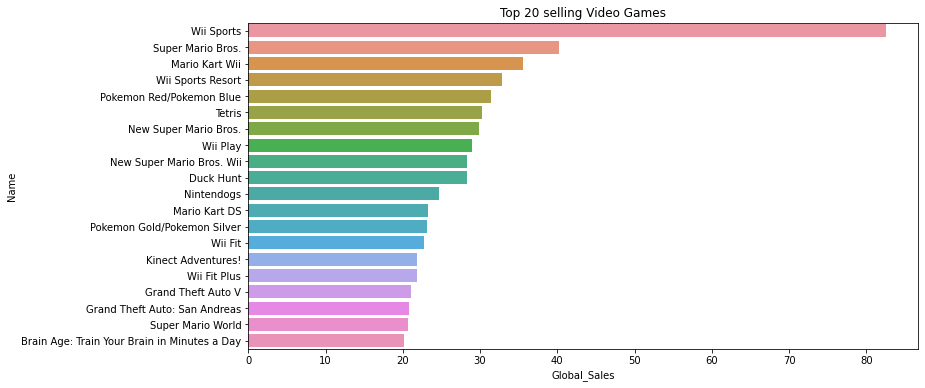

In [86]:
# Top selling games globally. Note the dataset is already sorted by number of global sales

plt.figure(figsize=(12,6))
plt.title("Top 20 selling Video Games")
sns.barplot(x=vg_data.Global_Sales.sort_values(ascending=False)[:20], y=vg_data.sort_values('Global_Sales', ascending=False).Name[:20])

Games released for Nintendo consoles here are very dominant comprising of 15 of the top 20 best selling video game titles. Wii Sports far and away the highest selling video game, notably due to it being included in bundles with the Nintendo Wii on release.

<AxesSubplot:title={'center':'Other'}, xlabel='Other_Sales', ylabel='Name'>

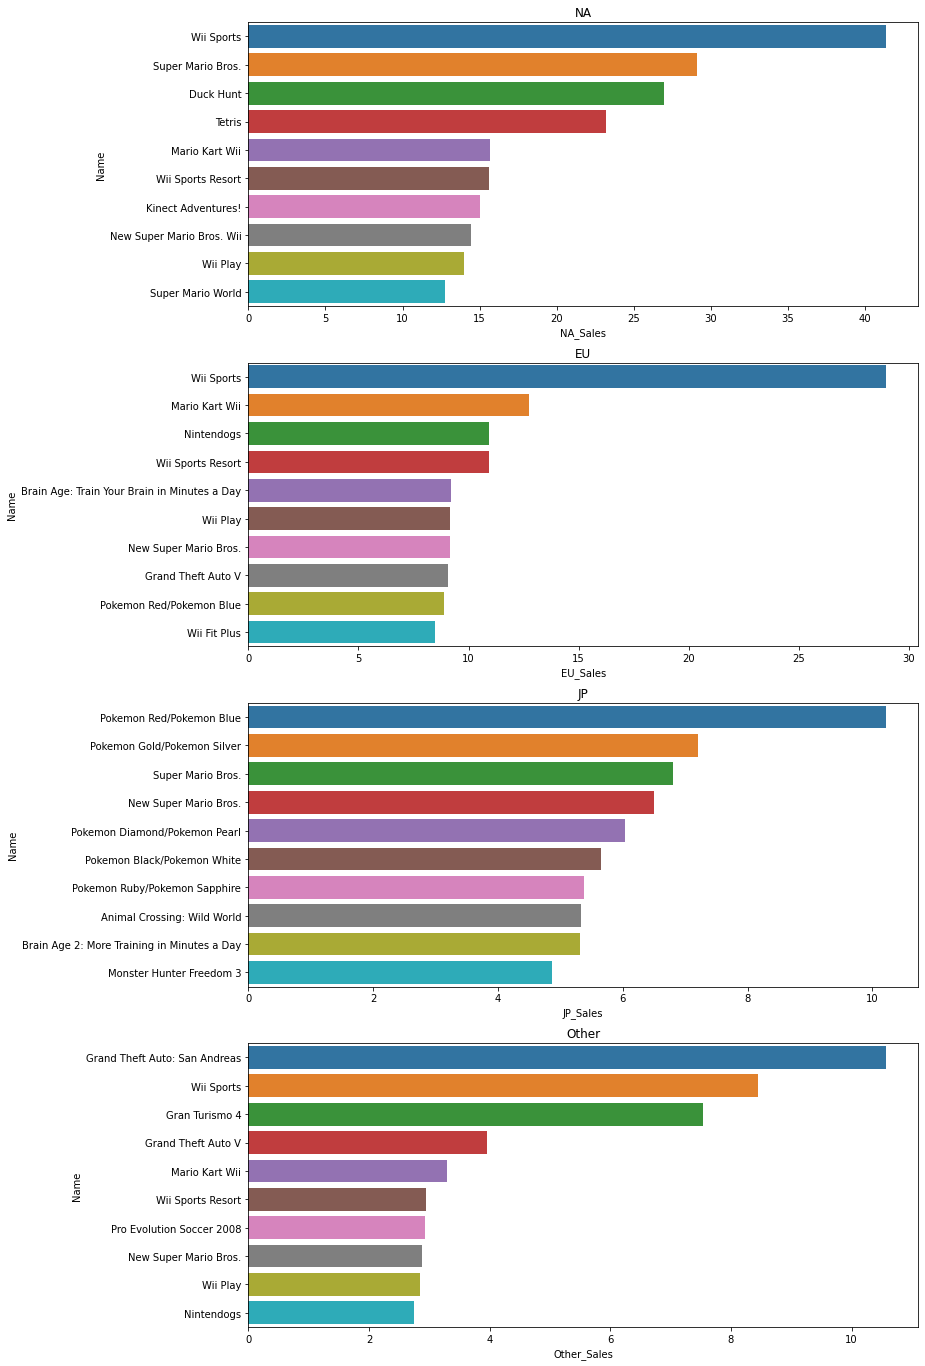

In [87]:
# Comparing top selling games in NA, EU & JP
fig, axes = plt.subplots(4,1, figsize=(12,24))

axes[0].set_title('NA')
sns.barplot(ax=axes[0],x=vg_data.NA_Sales.sort_values(ascending=False)[:10], y=vg_data.sort_values('NA_Sales', ascending=False).Name[:10])

axes[1].set_title('EU')
sns.barplot(ax=axes[1],x=vg_data.EU_Sales.sort_values(ascending=False)[:10], y=vg_data.sort_values('EU_Sales', ascending=False).Name[:10])

axes[2].set_title('JP')
sns.barplot(ax=axes[2],x=vg_data.JP_Sales.sort_values(ascending=False)[:10], y=vg_data.sort_values('JP_Sales', ascending=False).Name[:10])

axes[3].set_title('Other')
sns.barplot(ax=axes[3],x=vg_data.Other_Sales.sort_values(ascending=False)[:10], y=vg_data.sort_values('Other_Sales', ascending=False).Name[:10])

Looking closer at the sales in different regions, we can start to see some interesting patterns.

In North America, platforming games from Nintendo seem to be especially favoured.

In Europe, party games tend to be favoured (and interestingly, Grand Theft Auto V, the only action and non-Nintendo game).

Nintendo is dominant in all regions but especially so in Japan. Pokemon itself is very popular taking half of the top ten spots. Other Nintendo games such as Animal Crossing: Wild World uniquely appear only in Japan's top 10.

In Other regions, Nintendo is not nearly as dominant, action games such as Grand Theft Auto become far more popular instead.

In [88]:
NA_platforms = vg_data.sort_values(by='NA_Sales', ascending=False)[:50].Platform.value_counts()
EU_platforms = vg_data.sort_values(by='EU_Sales', ascending=False)[:50].Platform.value_counts()
JP_platforms = vg_data.sort_values(by='JP_Sales', ascending=False)[:50].Platform.value_counts()
other_platforms = vg_data.sort_values(by='Other_Sales', ascending=False)[:50].Platform.value_counts()

total_platforms = pd.concat([NA_platforms, EU_platforms, JP_platforms, other_platforms], axis=1, keys=['NA', 'EU', 'JP', 'Other']).fillna(0)
tot_platforms_order = total_platforms.sum(axis=1).sort_values(ascending=False).index

<AxesSubplot:title={'center':'Frequency of platforms in top selling games in NA, EU, JP & Other regions'}, ylabel='Count'>

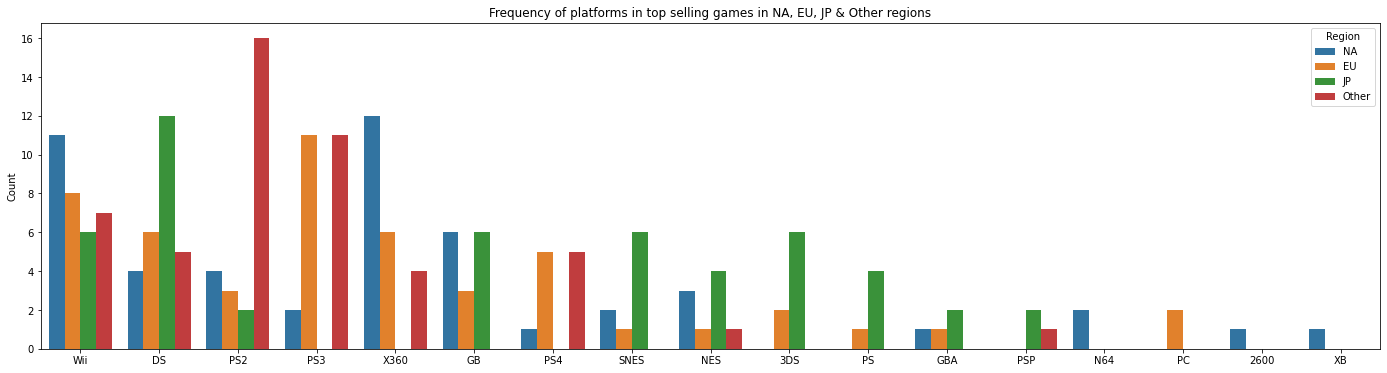

In [89]:
top_platforms = total_platforms.melt(ignore_index=False, var_name='Region', value_name='Count')

plt.figure(figsize=(24,6))
plt.title("Frequency of platforms in top selling games in NA, EU, JP & Other regions")
sns.barplot(y=top_platforms.Count, x=top_platforms.index, hue=top_platforms.Region, order=tot_platforms_order)

Here we can see some of the trends in more clarity:
- Microsoft consoles are most popular in North America
- Japan favours Nintendo consoles
- Other regions heavily favour Sony consoles over others

<h2> 3. Summary & Conclusion</h2>

In summary we have explored many different facets of the video game market:
- Region: 			North America has the highest sales out of all regions
- Platform:			PS2 and the Xbox 360 have the highest global sales
- Multiplatform:	Video games with multiplatform releases can sell very differently depending on the type of game.
- Genre:			The action genre has the highest total sales, but by mean sales, the platform genre does the best
- Genre & Platform:	Certain genres do perform much better on cetrain platforms. Most notably, platform video games on the Nintendo Gameboy and NES as well as Action games on the PS2, PS3 and Xbox 360
- Rating:			The average video game with a 'M' rating has the highest sales.
- Developers:		EA and Nintendo have the highest total sales of any developer
- Score:			Both have similar distributions with a negative skew.
- Popular Games:	Wii Sprots is the best selling game of all time with $82.53 million global sales

I hope you find this analysis interesting and perhaps useful for those of you out there who are looking to create video games in the future!